<a href="https://colab.research.google.com/github/jatin7k8/Yulu_bike_data_analysis/blob/main/Yulu_data_anlysis_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats


In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089',  parse_dates=['datetime'])


* paras_dates = ['column_name'] --> This is changing  object column which has date or time so `paras_dates` will change datatype of columns `datetime`

In [ ]:
df.rename(columns = {'atemp': 'feeling_temperature', 'casual':'casual_users', 'registered': 'registered_users', 'count':'Total_users'}, inplace = True)

In [ ]:
df.head()

datetime  season  holiday  workingday  weather  temp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84   
1 2011-01-01 01:00:00       1        0           0        1  9.02   
2 2011-01-01 02:00:00       1        0           0        1  9.02   
3 2011-01-01 03:00:00       1        0           0        1  9.84   
4 2011-01-01 04:00:00       1        0           0        1  9.84   

   feeling_temperature  humidity  windspeed  casual_users  registered_users  \
0               14.395        81        0.0             3                13   
1               13.635        80        0.0             8                32   
2               13.635        80        0.0             5                27   
3               14.395        75        0.0             3                10   
4               14.395        75        0.0             0                 1   

   Total_users  
0           16  
1           40  
2           32  
3           13  
4            1

# Basic Information About Data

In [ ]:
def overview(dataframe):
    m, n = dataframe.shape
    print(f"Total Number of rows/data points: {m}\nTotal number of columns: {n}")
    print("---" * 30, "\n")
    print("Data type of each column:\n", dataframe.dtypes)
    print("---" * 30, "\n")
    print("The number of null values in each column:\n", dataframe.isnull().sum())
    print("---" * 30, "\n")
    print(f"Number of total duplicate values: {dataframe.duplicated().sum()}")
    print("---" * 30, "\n")

    skewness = dataframe.skew(numeric_only = True)

    for column, skew_value in skewness.items():
        print(f"Skewness of column '{column}': {skew_value}")

        if round(skew_value) > 0:
            print(f"The skewness of '{column}' is positive (right-skewed).")
        elif round(skew_value) < 0:
            print(f"The skewness of '{column}' is negative (left-skewed).")
        else:
            print(f"The skewness of '{column}' is zero (symmetrical).")

        print("---" * 30, "\n")


# Example Usage:
# Assuming 'df' is your DataFrame
overview(df)


Total Number of rows/data points: 10886
Total number of columns: 12
------------------------------------------------------------------------------------------ 

Data type of each column:
 datetime               datetime64[ns]
season                          int64
holiday                         int64
workingday                      int64
weather                         int64
temp                          float64
feeling_temperature           float64
humidity                        int64
windspeed                     float64
casual_users                    int64
registered_users                int64
Total_users                     int64
dtype: object
------------------------------------------------------------------------------------------ 

The number of null values in each column:
 datetime               0
season                 0
holiday                0
workingday             0
weather                0
temp                   0
feeling_temperature    0
humidity               0
windsp

## 👀 Insights :-
 * Data points: - 10886.
 * Total Columns:- 12 .
 * There is `zero null` values.
 * There is  `zero duplicate` values.
 * Checking columns the Skewness:-
    * zero (symmetrical) :- **'atemp', 'humidity', 'temp'**
    * positive (right-skewed) :- **'count', 'registered', 'casual', 'windspeed', 'holiday'**
    * negative (left-skewed) :- **'workingday'**
    

In [ ]:
df['Hourly'] = df['datetime'].dt.hour
df['Hourly'] = df['Hourly'].apply(lambda x: 'Dawn' if x<=4 else('Early Morning'
                                        if x <=9 else('Noon' if x <=16
                                                      else ('Late Evening' if x<=21 else 'Night'))))
df['Hourly'].sample(10)

5087              Dawn
9144     Early Morning
6024     Early Morning
10518             Noon
6104              Noon
4319              Dawn
4922              Dawn
7452      Late Evening
8597              Noon
2355              Dawn
Name: Hourly, dtype: object

In [ ]:
df['weather'] = df.groupby('weather')['weather'].apply(lambda x: x.map({1: 'Clear Sky/Partly Cloudy',
                                                                        2:'Misty/Cloudy' ,
                                                                        3: 'Light Precipitation',
                                                                        4: 'Heavy Precipitation/Extreme Conditions'}))
df['weather'][:5]

<ipython-input-7-a34767ab4e23>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['weather'] = df.groupby('weather')['weather'].apply(lambda x: x.map({1: 'Clear Sky/Partly Cloudy',


0    Clear Sky/Partly Cloudy
1    Clear Sky/Partly Cloudy
2    Clear Sky/Partly Cloudy
3    Clear Sky/Partly Cloudy
4    Clear Sky/Partly Cloudy
Name: weather, dtype: object

In [ ]:
# Data Conversion
df['season'] = df.groupby('season')['season'].apply(lambda x: x.map({1: 'spring',
                          2:'summer',
                          3: 'fall',
                          4: 'winter'}))

<ipython-input-8-3c8a34284a1e>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['season'] = df.groupby('season')['season'].apply(lambda x: x.map({1: 'spring',


# 🧠Memory Optimization :-

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             10886 non-null  datetime64[ns]
 1   season               10886 non-null  object        
 2   holiday              10886 non-null  int64         
 3   workingday           10886 non-null  int64         
 4   weather              10886 non-null  object        
 5   temp                 10886 non-null  float64       
 6   feeling_temperature  10886 non-null  float64       
 7   humidity             10886 non-null  int64         
 8   windspeed            10886 non-null  float64       
 9   casual_users         10886 non-null  int64         
 10  registered_users     10886 non-null  int64         
 11  Total_users          10886 non-null  int64         
 12  Hourly               10886 non-null  object        
dtypes: datetime64[ns](1), float64(3

In [ ]:
for i in df.columns:
  print("Before optimization Memory Usage for feature :- ", i)
  print("\t\t", df[i].memory_usage())
  print("--"*30)

Before optimization Memory Usage for feature :-  datetime
		 87216
------------------------------------------------------------
Before optimization Memory Usage for feature :-  season
		 87216
------------------------------------------------------------
Before optimization Memory Usage for feature :-  holiday
		 87216
------------------------------------------------------------
Before optimization Memory Usage for feature :-  workingday
		 87216
------------------------------------------------------------
Before optimization Memory Usage for feature :-  weather
		 87216
------------------------------------------------------------
Before optimization Memory Usage for feature :-  temp
		 87216
------------------------------------------------------------
Before optimization Memory Usage for feature :-  feeling_temperature
		 87216
------------------------------------------------------------
Before optimization Memory Usage for feature :-  humidity
		 87216
--------------------------------

Observation :- now we can clearly see our memory of data set in **1.1MB** , and every feature is using **87216** memory

In [ ]:
# before optimization check the max value i can change dtype
for i in df.columns:
  print("Max value for column ", i )
  print( "\t",df[i].max())
  print("---" * 30, "\n")

Max value for column  datetime
	 2012-12-19 23:00:00
------------------------------------------------------------------------------------------ 

Max value for column  season
	 winter
------------------------------------------------------------------------------------------ 

Max value for column  holiday
	 1
------------------------------------------------------------------------------------------ 

Max value for column  workingday
	 1
------------------------------------------------------------------------------------------ 

Max value for column  weather
	 Misty/Cloudy
------------------------------------------------------------------------------------------ 

Max value for column  temp
	 41.0
------------------------------------------------------------------------------------------ 

Max value for column  feeling_temperature
	 45.455
------------------------------------------------------------------------------------------ 

Max value for column  humidity
	 100
--------------------

In [ ]:
# checking the dtype for memory optimization
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')
df['holiday'] = df['holiday'].astype('int8')
df['workingday'] = df['workingday'].astype('int8')
df['temp'] = df['temp'].astype('float32')
df['feeling_temperature'] = df['feeling_temperature'].astype('float32')
df['windspeed'] = df['windspeed'].astype('float32')
df['humidity'] = df['humidity'].astype('int8')
df['casual_users'] = df['casual_users'].astype('int16')
df['registered_users'] = df['registered_users'].astype('int16')
df['Total_users'] = df['Total_users'].astype('int16')
df['Hourly'] = df['Hourly'].astype('category')


In [ ]:
for i in df.columns:
  print("Memory Usage for feature :- ", i)
  print("\t\t", df[i].memory_usage())
  print("--"*30)


Memory Usage for feature :-  datetime
		 87216
------------------------------------------------------------
Memory Usage for feature :-  season
		 11218
------------------------------------------------------------
Memory Usage for feature :-  holiday
		 11014
------------------------------------------------------------
Memory Usage for feature :-  workingday
		 11014
------------------------------------------------------------
Memory Usage for feature :-  weather
		 11218
------------------------------------------------------------
Memory Usage for feature :-  temp
		 43672
------------------------------------------------------------
Memory Usage for feature :-  feeling_temperature
		 43672
------------------------------------------------------------
Memory Usage for feature :-  humidity
		 11014
------------------------------------------------------------
Memory Usage for feature :-  windspeed
		 43672
------------------------------------------------------------
Memory Usage for featu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             10886 non-null  datetime64[ns]
 1   season               10886 non-null  category      
 2   holiday              10886 non-null  int8          
 3   workingday           10886 non-null  int8          
 4   weather              10886 non-null  category      
 5   temp                 10886 non-null  float32       
 6   feeling_temperature  10886 non-null  float32       
 7   humidity             10886 non-null  int8          
 8   windspeed            10886 non-null  float32       
 9   casual_users         10886 non-null  int16         
 10  registered_users     10886 non-null  int16         
 11  Total_users          10886 non-null  int16         
 12  Hourly               10886 non-null  category      
dtypes: category(3), datetime64[ns](

## 🏷️ Insights
Earlier the dataset was using **1.1+ MB of memory** but now it has been using  to **330.1 KB meomry**. Around **70 %  reduction** in the memory usage.


# 📝 Statistical Summary

In [ ]:
df.describe(exclude=np.number)

<ipython-input-15-a8531fa89b2e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=np.number)


datetime  season                  weather Hourly
count                 10886   10886                    10886  10886
unique                10886       4                        4      5
top     2011-01-01 00:00:00  winter  Clear Sky/Partly Cloudy   Noon
freq                      1    2734                     7192   3190
first   2011-01-01 00:00:00     NaN                      NaN    NaN
last    2012-12-19 23:00:00     NaN                      NaN    NaN

In [ ]:
df.describe()

holiday    workingday          temp  feeling_temperature  \
count  10886.000000  10886.000000  10886.000000         10886.000000   
mean       0.028569      0.680875     20.230862            23.655085   
std        0.166599      0.466159      7.791590             8.474601   
min        0.000000      0.000000      0.820000             0.760000   
25%        0.000000      0.000000     13.940000            16.665001   
50%        0.000000      1.000000     20.500000            24.240000   
75%        0.000000      1.000000     26.240000            31.059999   
max        1.000000      1.000000     41.000000            45.455002   

           humidity     windspeed  casual_users  registered_users  \
count  10886.000000  10886.000000  10886.000000      10886.000000   
mean      61.886460     12.799396     36.021955        155.552177   
std       19.245033      8.164537     49.960477        151.039033   
min        0.000000      0.000000      0.000000          0.000000   
25%       47.000000      7.001500      4.000000         36.000000   
50%       62.000000     12.998000     17.000000        118.000000   
75%       77.000000     16.997900     49.000000        222.000000   
max      100.000000     56.996899    367.000000        886.000000   

        Total_users  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

## 👀 Insights :-
* **`datetime column :-`**  it is evident that the **dataset spans from January 1, 2011, at 00:00:00 to December 19, 2012, at 23:00:00.** This duration encompasses precisely two years of data, providing a clear **temporal context for the information contained in the dataset**. Understanding the temporal scope is essential for **analyzing patterns, trends, and seasonality within the provided time frame.**

* **`Season Feature :-`** Winter is the most occuring season in our dataset.

* **`Weather Feature :-`** Clear Sky/Partly Cloudy is the most occuring weather in our dataset.

* **`temp Feature :-`** Average temperature is 20.23 degree celecisu and max temperature is 41.00  celcisusfor our dataset

* **`atemp Feature :-`** Average feeling temperature is 23.65 degree celecisu and max feeling temperature is 45.45 celcius for our dataset

* **`Humidity Feature :-`** Average Humidity is 61.88  and maximum humidity is 100  for our dataset


# EDA :-

## Non Grapical Analysis : -

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'feeling_temperature', 'humidity', 'windspeed', 'casual_users',
       'registered_users', 'Total_users', 'Hourly'],
      dtype='object')

In [ ]:
# statical information numerical vs categorical
def statical_info_cat(df, column_list):
  for i in column_list:
    print(f"\t\t\t\t\t Statical inforamtion for featuere `{i}`" )
    display(df.groupby(i).agg(Average_Temperature = ('temp','mean'),
                            Average_Feeling_Temperature = ("feeling_temperature",'mean'),
                            Average_Humididty = ('humidity', 'mean'),
                            Average_Windspeed = ('windspeed', 'mean'),
                            Average_Casual_Bike_rents = ('casual_users', 'mean'),
                            Average_Registered_Bike_rents = ('registered_users', 'mean'),
                            Average_Total_Bike_rents = ('Total_users', 'mean')))
    print("--"*100)
    print()
    print()

In [ ]:
cat_col = ['season', 'weather','holiday','workingday','Hourly']
statical_info_cat(df, cat_col)

					 Statical inforamtion for featuere `season`


Average_Temperature  Average_Feeling_Temperature  Average_Humididty  \
season                                                                        
fall              28.789110                    32.540783          64.123674   
spring            12.530491                    15.228956          56.297841   
summer            22.823483                    26.647100          60.852909   
winter            16.649239                    20.059908          66.173738   

        Average_Windspeed  Average_Casual_Bike_rents  \
season                                                 
fall            11.508862                  52.220271   
spring          14.636977                  15.489576   
summer          13.405607                  47.446762   
winter          11.678146                  28.580834   

        Average_Registered_Bike_rents  Average_Total_Bike_rents  
season                                                           
fall                       182.196853                234.417124  
spring                     100.853686                116.343261  
summer                     167.804610                215.251372  
winter                     170.407462                198.988296

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


					 Statical inforamtion for featuere `weather`


Average_Temperature  \
weather                                                       
Clear Sky/Partly Cloudy                           20.557121   
Heavy Precipitation/Extreme Conditions             8.200000   
Light Precipitation                               19.546356   
Misty/Cloudy                                      19.614609   

                                        Average_Feeling_Temperature  \
weather                                                               
Clear Sky/Partly Cloudy                                   23.994125   
Heavy Precipitation/Extreme Conditions                    11.365000   
Light Precipitation                                       22.753090   
Misty/Cloudy                                              23.072412   

                                        Average_Humididty  Average_Windspeed  \
weather                                                                        
Clear Sky/Partly Cloudy                         56.716769          12.892542   
Heavy Precipitation/Extreme Conditions          86.000000           6.003200   
Light Precipitation                             81.341094          14.071248   
Misty/Cloudy                                    69.100565          12.179905   

                                        Average_Casual_Bike_rents  \
weather                                                             
Clear Sky/Partly Cloudy                                 40.308676   
Heavy Precipitation/Extreme Conditions                   6.000000   
Light Precipitation                                     17.442375   
Misty/Cloudy                                            30.785462   

                                        Average_Registered_Bike_rents  \
weather                                                                 
Clear Sky/Partly Cloudy                                    164.928115   
Heavy Precipitation/Extreme Conditions                     158.000000   
Light Precipitation                                        101.403958   
Misty/Cloudy                                               148.170078   

                                        Average_Total_Bike_rents  
weather                                                           
Clear Sky/Partly Cloudy                               205.236791  
Heavy Precipitation/Extreme Conditions                164.000000  
Light Precipitation                                   118.846333  
Misty/Cloudy                                          178.955540

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


					 Statical inforamtion for featuere `holiday`


Average_Temperature  Average_Feeling_Temperature  Average_Humididty  \
holiday                                                                        
0                  20.230465                    23.662663          61.880095   
1                  20.244244                    23.397394          62.102894   

         Average_Windspeed  Average_Casual_Bike_rents  \
holiday                                                 
0                12.787622                  35.646714   
1                13.199712                  48.781350   

         Average_Registered_Bike_rents  Average_Total_Bike_rents  
holiday                                                           
0                           156.094941                191.741655  
1                           137.096463                185.877814

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


					 Statical inforamtion for featuere `workingday`


Average_Temperature  Average_Feeling_Temperature  \
workingday                                                     
0                     19.889837                    23.349838   
1                     20.390697                    23.798153   

            Average_Humididty  Average_Windspeed  Average_Casual_Bike_rents  \
workingday                                                                    
0                   62.192286          12.639916                  59.308290   
1                   61.743119          12.874143                  25.107663   

            Average_Registered_Bike_rents  Average_Total_Bike_rents  
workingday                                                           
0                              129.198330                188.506621  
1                              167.904209                193.011873

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


					 Statical inforamtion for featuere `Hourly`


Average_Temperature  Average_Feeling_Temperature  \
Hourly                                                            
Dawn                     18.519436                    21.896770   
Early Morning            18.140696                    21.439608   
Late Evening             21.418903                    24.896996   
Night                    19.555021                    23.003963   
Noon                     22.261072                    25.761786   

               Average_Humididty  Average_Windspeed  \
Hourly                                                
Dawn                   70.814068          10.429111   
Early Morning          70.926496          11.219973   
Late Evening           56.250439          14.098428   
Night                  65.608553          11.461011   
Noon                   52.165517          15.036929   

               Average_Casual_Bike_rents  Average_Registered_Bike_rents  \
Hourly                                                                    
Dawn                            5.164427                      21.108871   
Early Morning                  13.819982                     165.128521   
Late Evening                   50.242544                     273.115789   
Night                          19.032895                      92.509868   
Noon                           68.118495                     176.796552   

               Average_Total_Bike_rents  
Hourly                                   
Dawn                          26.273297  
Early Morning                178.948504  
Late Evening                 323.358333  
Night                        111.542763  
Noon                         244.915047

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
def proportion(x, columns):
    for i in columns:
        print(f"\t\t Percentage wise information for feature `{i}`" )
        result = round(x[i].value_counts(normalize=True) * 100, 2).to_frame('Percentage').reset_index()
        result.rename(columns={'index': i}, inplace=True)
        display(result)
        print("--"*100)
        print()

In [ ]:
cat_col = ['season', 'weather','holiday','workingday','Hourly']
proportion(df, cat_col)

		 Percentage wise information for feature `season`


season  Percentage
0  winter       25.11
1    fall       25.11
2  summer       25.11
3  spring       24.67

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

		 Percentage wise information for feature `weather`


weather  Percentage
0                 Clear Sky/Partly Cloudy       66.07
1                            Misty/Cloudy       26.03
2                     Light Precipitation        7.89
3  Heavy Precipitation/Extreme Conditions        0.01

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

		 Percentage wise information for feature `holiday`


holiday  Percentage
0        0       97.14
1        1        2.86

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

		 Percentage wise information for feature `workingday`


workingday  Percentage
0           1       68.09
1           0       31.91

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

		 Percentage wise information for feature `Hourly`


Hourly  Percentage
0           Noon       29.30
1   Late Evening       20.94
2  Early Morning       20.87
3           Dawn       20.50
4          Night        8.38

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



# 📈Univariate Analysis:-

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


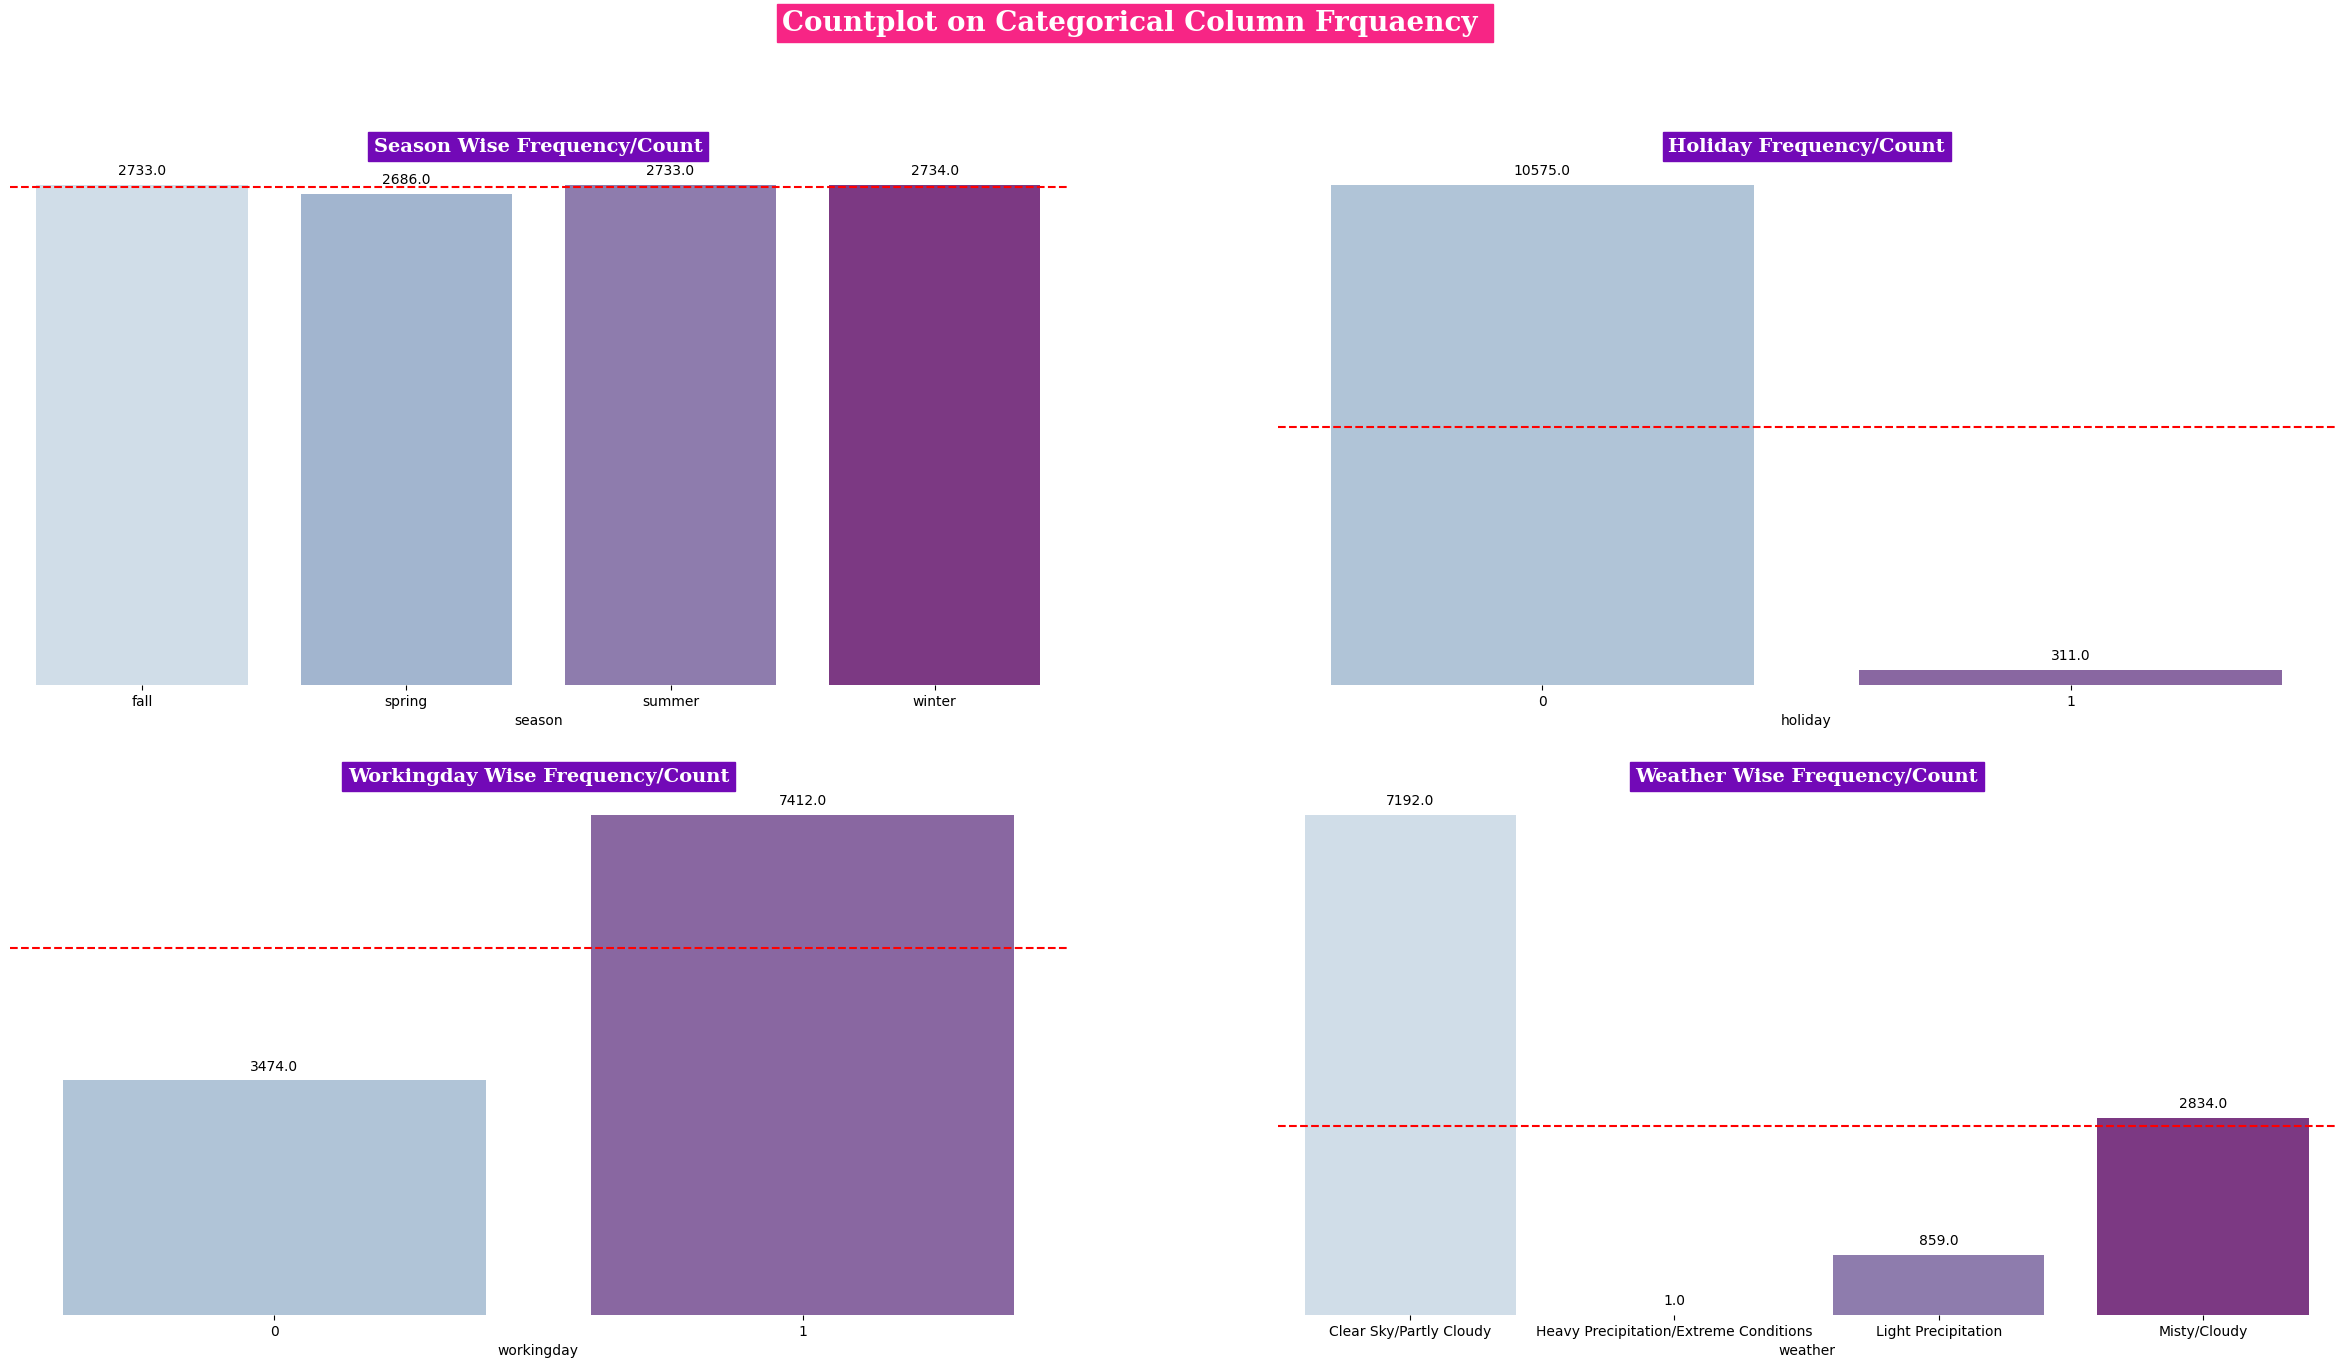

In [ ]:
plt.figure(figsize=(30,15))
plt.suptitle('Countplot on Categorical Column Frquaency ',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')

plt.subplot(221)
ax = sns.countplot(palette='BuPu' , x='season', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f"Season Wise Frequency/Count", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
# reomove the box
sns.despine(left=True,bottom=True)
# Remove y-axis labels
plt.yticks([])
plt.ylabel(None)
average_counts = df.groupby('season')['season'].count().mean()
plt.axhline(y=average_counts, color='red', linestyle='--', label='Average Count')
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

plt.subplot(222)
ax = sns.countplot(palette='BuPu' , x='holiday', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f"Holiday Frequency/Count", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(left=True,bottom=True)
plt.yticks([])
plt.ylabel(None)
average_counts = df.groupby('holiday')['holiday'].count().mean()
plt.axhline(y=average_counts, color='red', linestyle='--', label='Average Count')

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

plt.subplot(223)
ax = sns.countplot(palette='BuPu' , x='workingday', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f"Workingday Wise Frequency/Count", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(left=True,bottom=True)
plt.yticks([])
plt.ylabel(None)
average_counts = df.groupby('workingday')['workingday'].count().mean()
plt.axhline(y=average_counts, color='red', linestyle='--', label='Average Count')

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

plt.subplot(224)
ax = sns.countplot(palette='BuPu' , x='weather', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f"Weather Wise Frequency/Count", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(left=True,bottom=True)
plt.yticks([])
plt.ylabel(None)
average_counts = df.groupby('weather')['weather'].count().mean()
plt.axhline(y=average_counts, color='red', linestyle='--', label='Average Count')
plt.show()


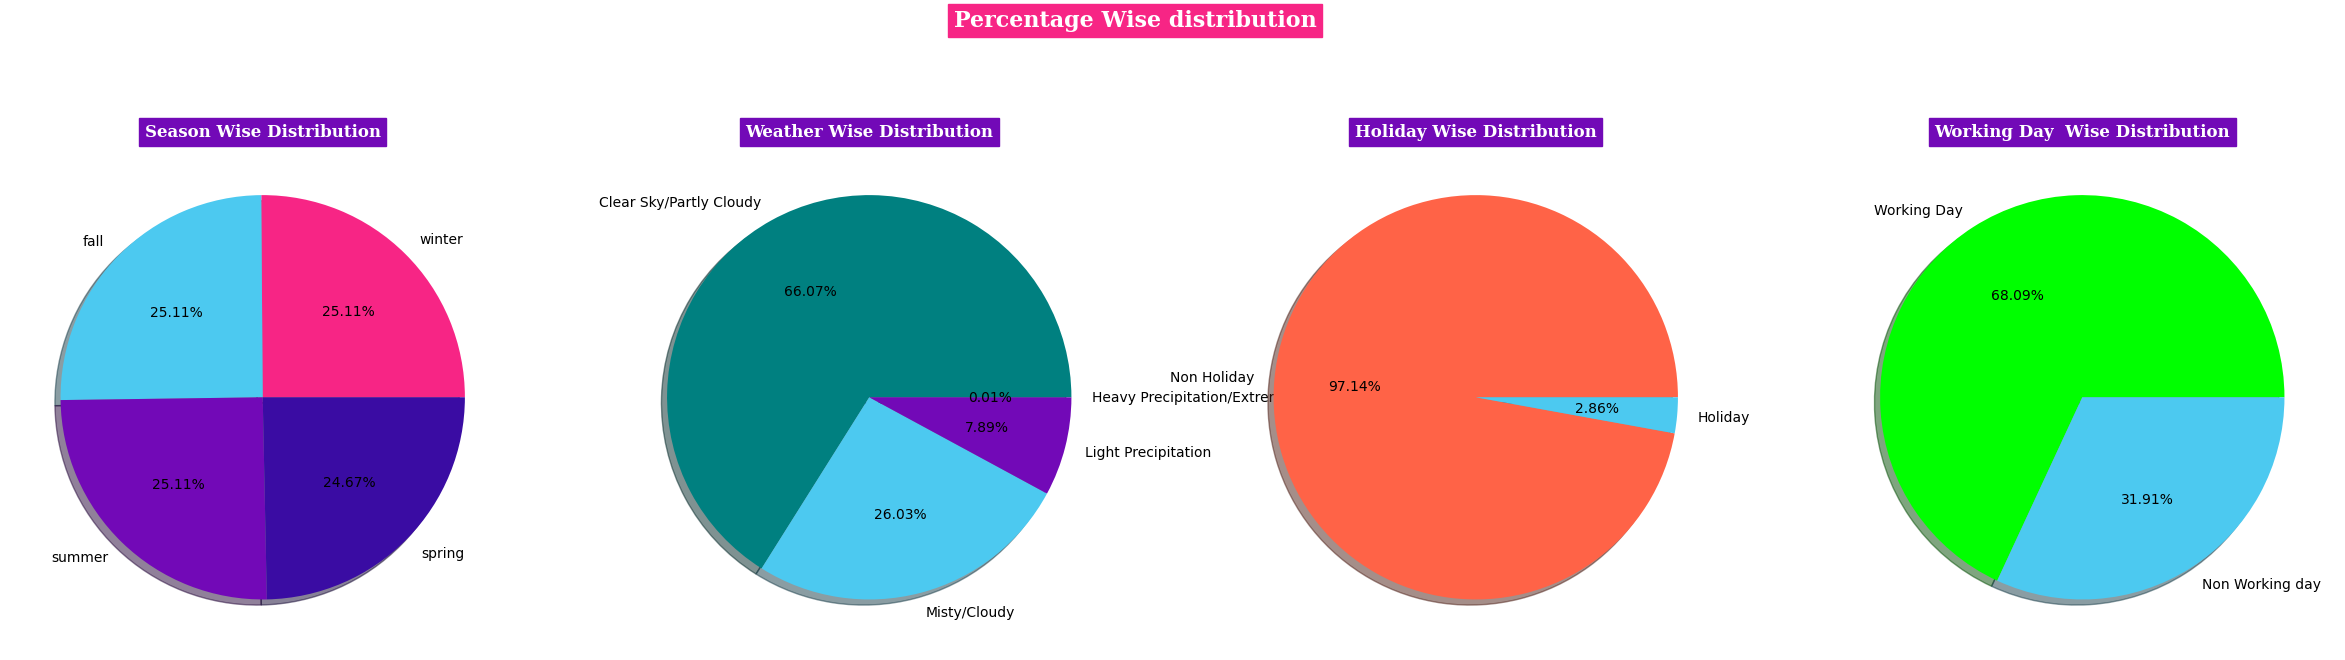

In [ ]:
plt.figure(figsize = (30, 8))
plt.suptitle('Percentage Wise distribution',fontsize=16,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')

plt.subplot(141)
plt.pie(df['season'].value_counts(), labels = df['season'].value_counts().index,
        autopct='%.2f%%',colors =  ["#F72585", "#4CC9F0","#7209B7", "#3A0CA3"],
        textprops = {'color':'black', 'fontsize': 10}, shadow = True)
plt.title(f"Season Wise Distribution", fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')


plt.subplot(142)
plt.pie(df['weather'].value_counts(), labels = df['weather'].value_counts().index,
        autopct='%.2f%%',colors =  [ "#008080", "#4CC9F0","#7209B7", "#3A0CA3"],
        textprops = {'color':'black', 'fontsize': 10}, shadow = True)
plt.title(f"Weather Wise Distribution", fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')

plt.subplot(143)
plt.pie(df['holiday'].value_counts(), labels = ['Non Holiday', 'Holiday'],
        autopct='%.2f%%',colors =  [ "#FF6347", "#4CC9F0","#7209B7", "#3A0CA3"],
        textprops = {'color':'black', 'fontsize': 10}, shadow = True)
plt.title(f"Holiday Wise Distribution", fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')


plt.subplot(144)
plt.pie(df['workingday'].value_counts(), labels = ['Working Day', 'Non Working day'],
        autopct='%.2f%%',colors =  ["#00FF00" , "#4CC9F0","#7209B7", "#3A0CA3"],
        textprops = {'color':'black', 'fontsize': 10}, shadow = True)
plt.title(f"Working Day  Wise Distribution", fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')

plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

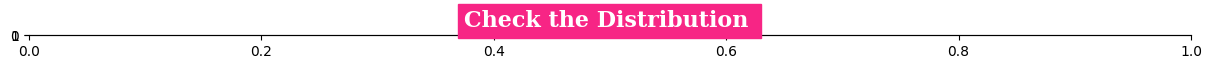

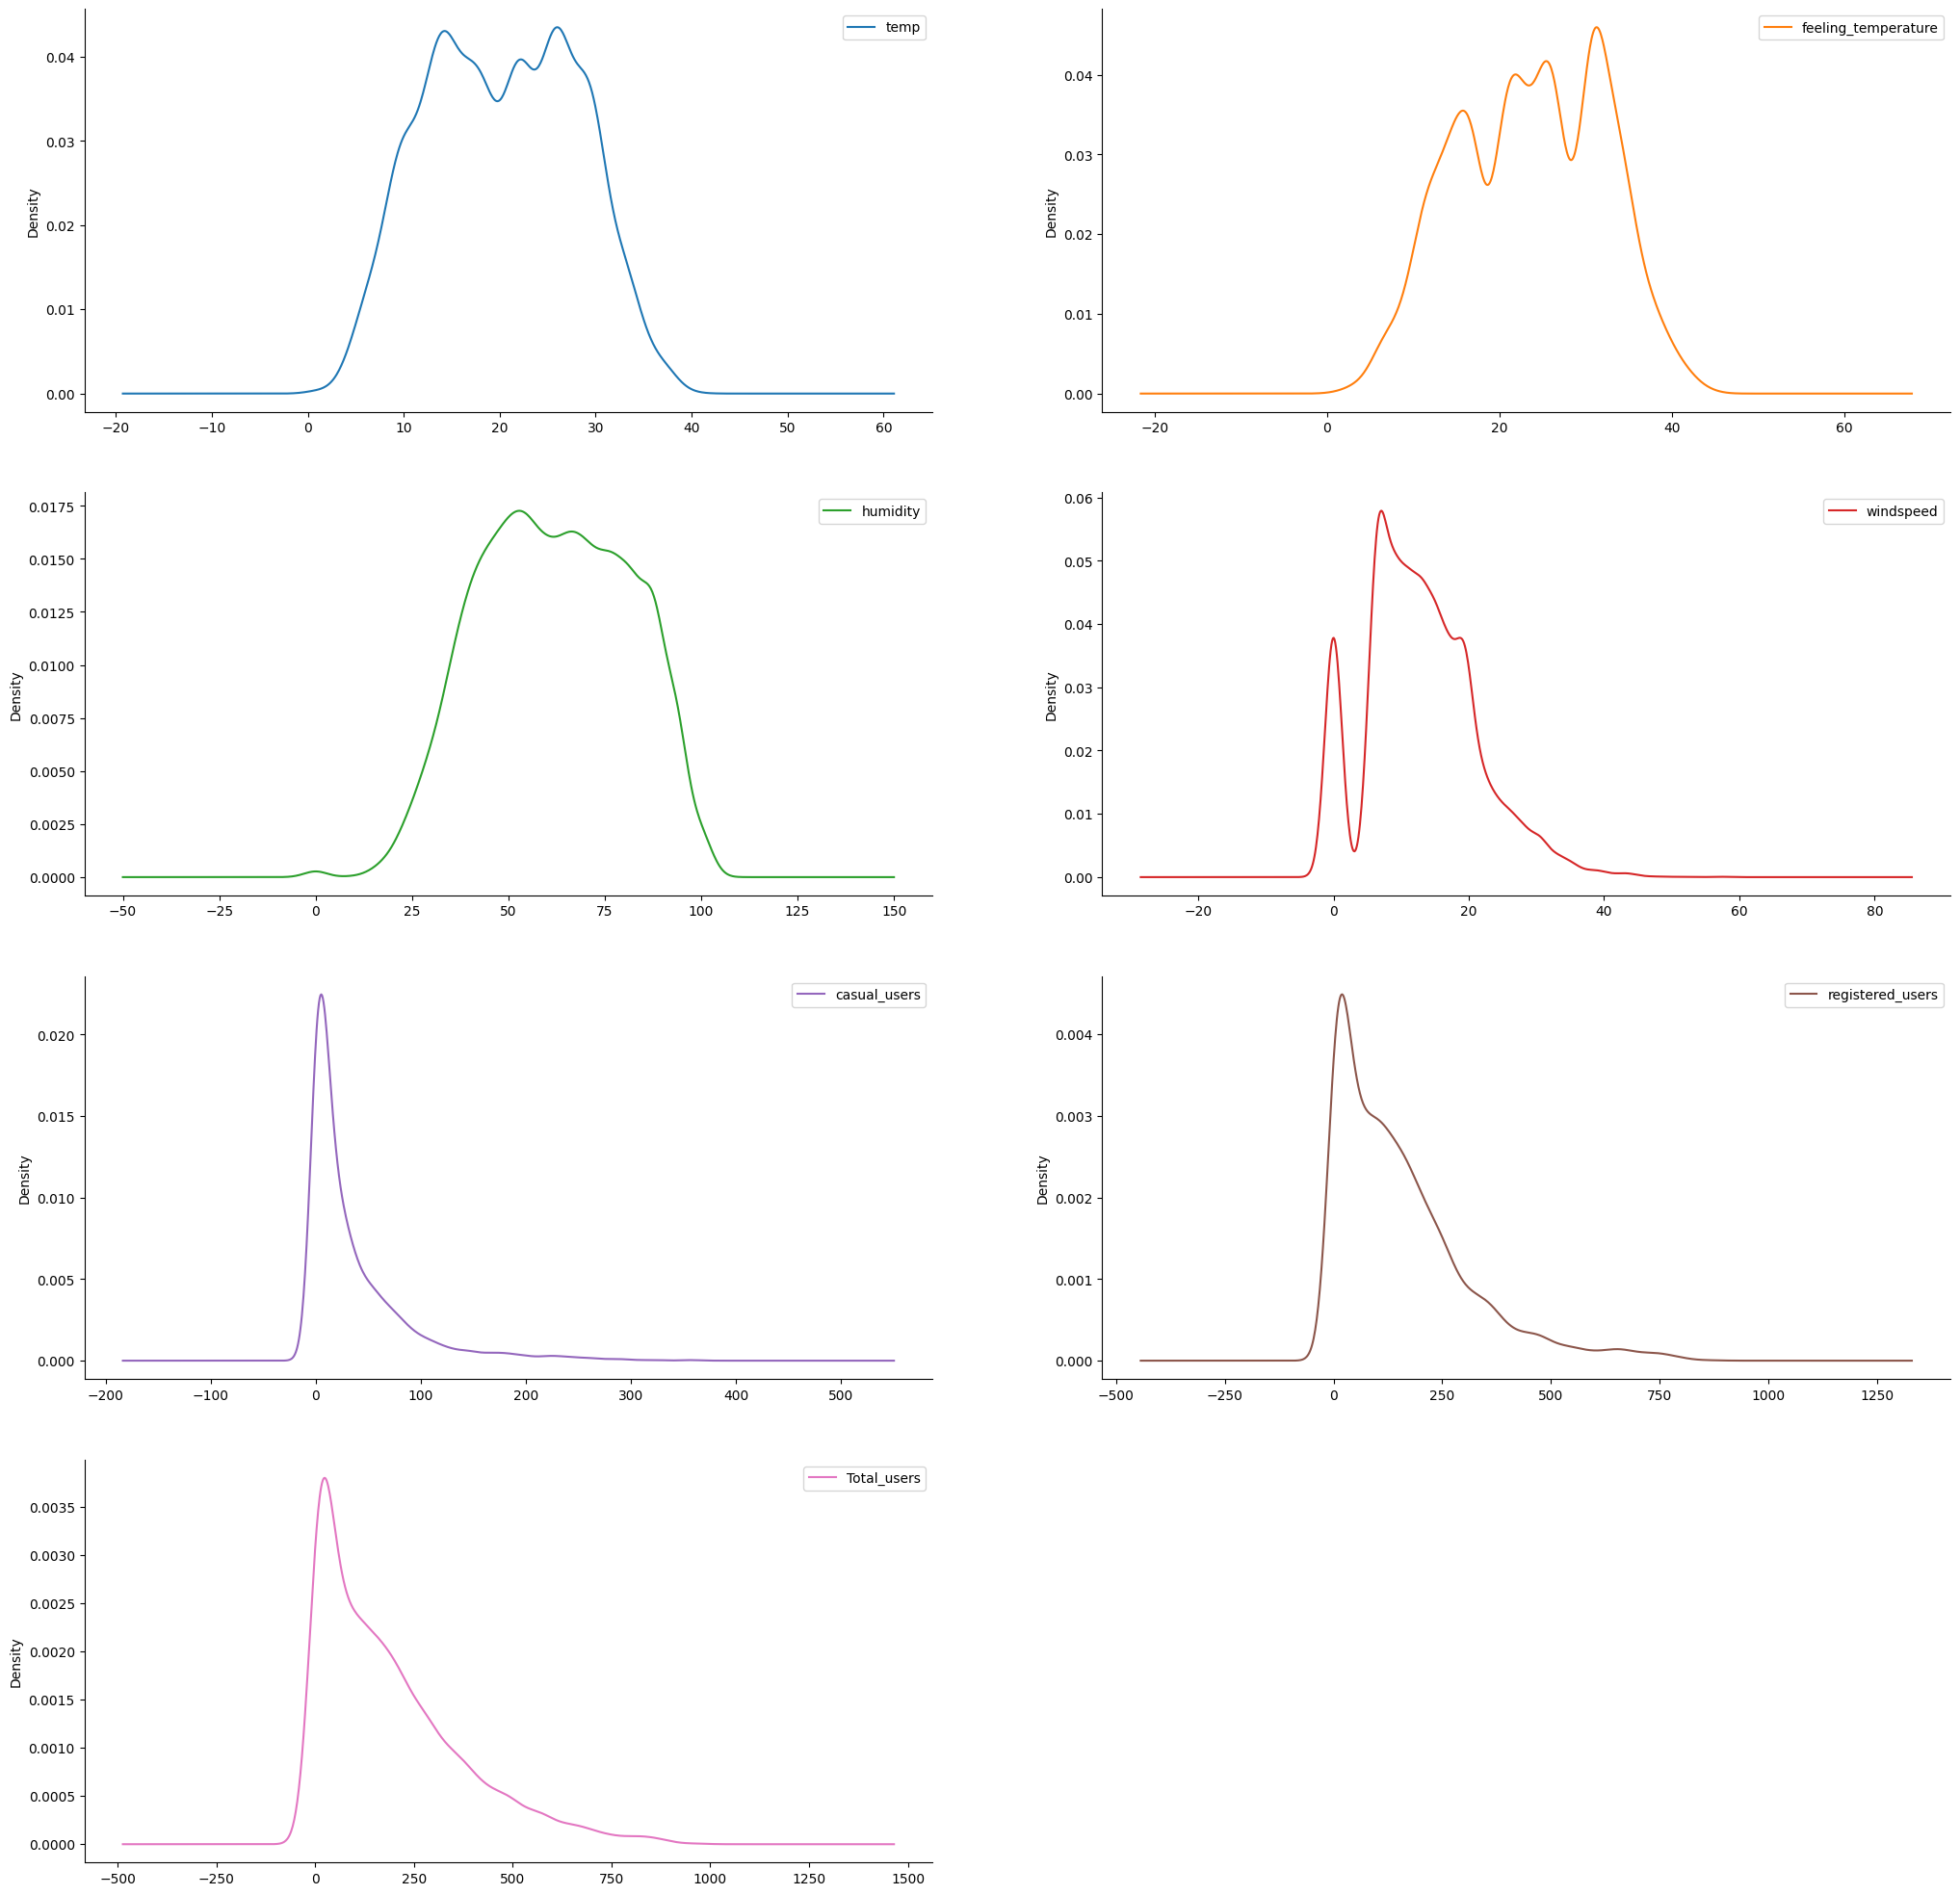

In [ ]:
plt.figure(figsize=(15,0))
plt.title('Check the Distribution ',fontsize=16,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')
plt.rcParams['figure.figsize'] = [25, 25]
num_cols = df.iloc[:,5:]
num_cols.plot(kind='density', subplots=True, layout=(4,2), sharex=False)
sns.despine()
plt.show()

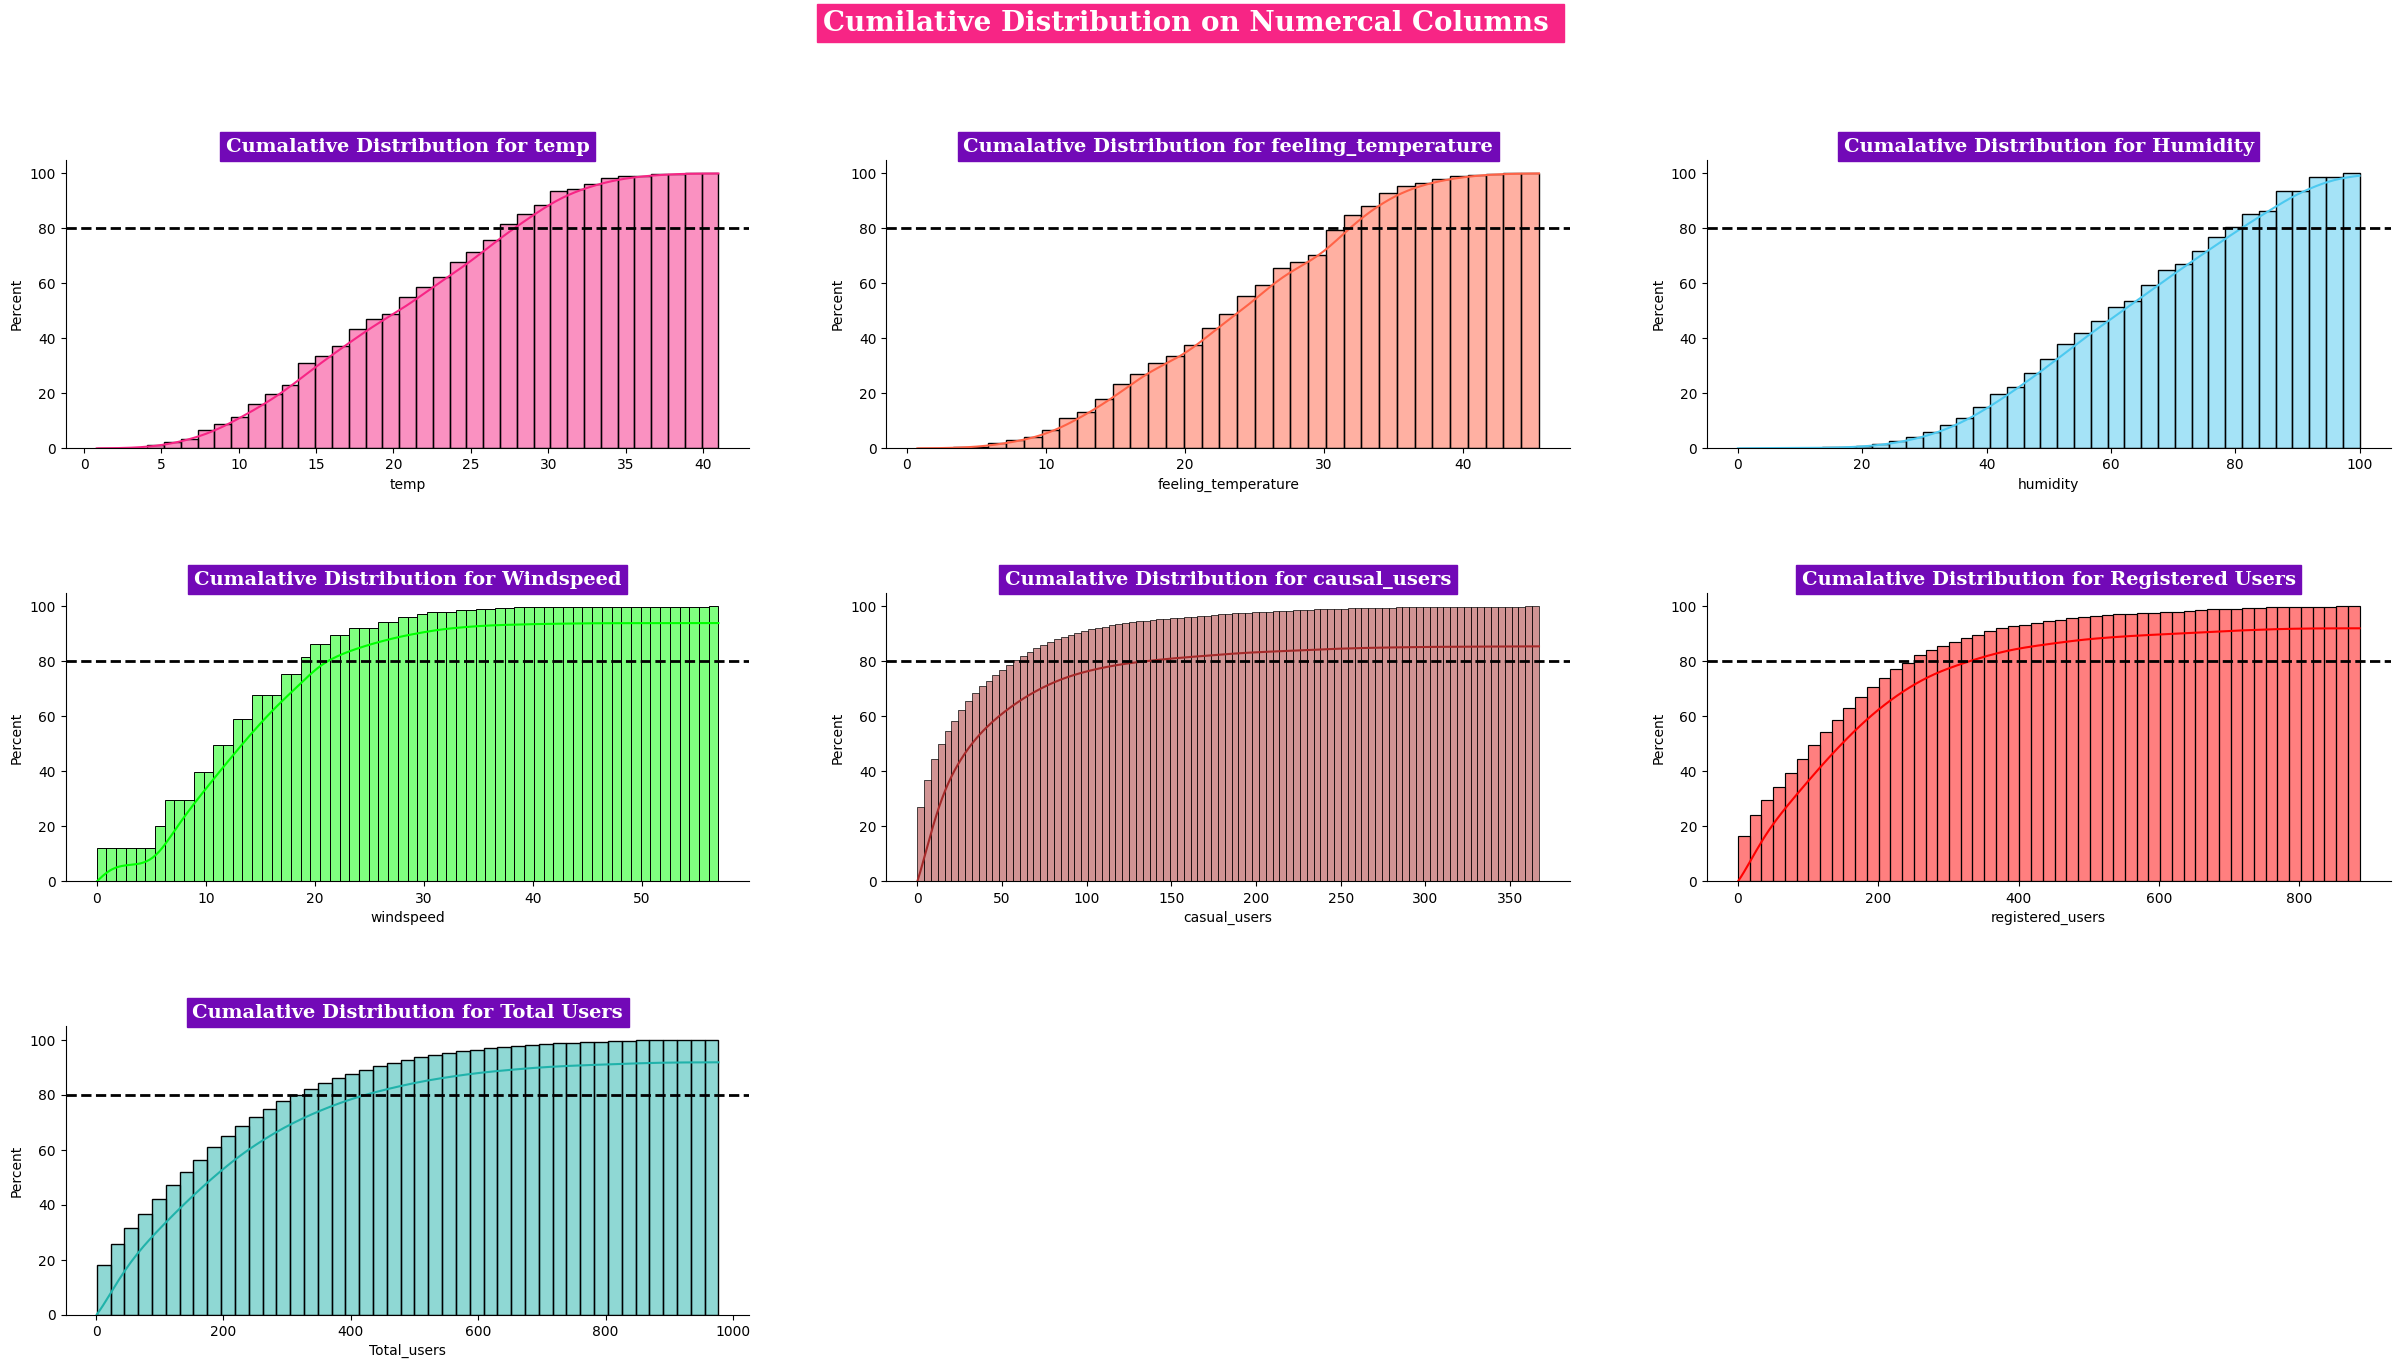

In [ ]:
plt.figure(figsize=(30,15))
plt.suptitle('Cumilative Distribution on Numercal Columns ',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')
plt.subplot(331)
ax = sns.histplot(color = "#F72585" , x='temp', data=df, kde = True, cumulative = True, stat = 'percent')
plt.title(f"Cumalative Distribution for temp", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(top = True)
plt.axhline(y=80, color='black', linestyle='--', linewidth=2)

plt.subplot(332)
ax = sns.histplot(color = "#FF6347" , x='feeling_temperature', data=df, kde = True, cumulative = True, stat = 'percent')
plt.title(f"Cumalative Distribution for feeling_temperature", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(top = True)
plt.axhline(y=80, color='black', linestyle='--', linewidth=2)

plt.subplot(333)
ax = sns.histplot(color = "#4CC9F0", x='humidity', data=df, kde = True, cumulative = True, stat = 'percent')
plt.title(f"Cumalative Distribution for Humidity", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(top = True)
plt.axhline(y=80, color='black', linestyle='--', linewidth=2)

plt.subplot(334)
ax = sns.histplot(color = "#00FF00" , x='windspeed', data=df, kde = True, cumulative = True, stat = 'percent')
plt.title(f"Cumalative Distribution for Windspeed", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(top = True)
plt.axhline(y=80, color='black', linestyle='--', linewidth=2)


plt.subplot(335)
ax = sns.histplot(color = "brown" , x='casual_users', data=df, kde = True, cumulative = True, stat = 'percent')
plt.title(f"Cumalative Distribution for causal_users", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(top = True)
plt.axhline(y=80, color='black', linestyle='--', linewidth=2)

plt.subplot(336)
ax = sns.histplot(color = 'red' , x='registered_users', data=df, kde = True, cumulative = True, stat = 'percent')
plt.title(f"Cumalative Distribution for Registered Users", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(top = True)
plt.axhline(y=80, color='black', linestyle='--', linewidth=2)

plt.subplot(337)
ax = sns.histplot(color = 'lightseagreen' , x='Total_users', data=df, kde = True, cumulative = True, stat = 'percent')
plt.title(f"Cumalative Distribution for Total Users", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="#7209B7",color='w')
sns.despine(top = True)
plt.axhline(y=80, color='black', linestyle='--', linewidth=2)

plt.subplots_adjust(hspace=0.5)
plt.show()

# 🕒 Analaysis According to Time

##  What is the Average growth percentage of Total users for each season in each year?

### Statical Calculation:-

In [ ]:
yearly_season_avg_tread = df.groupby([df['datetime'].dt.year, 'season'])['Total_users'].mean().reset_index()
yearly_season_avg_tread['prev_year']= yearly_season_avg_tread['Total_users'].shift(1)
yearly_season_avg_tread['growth_percentage']  = (yearly_season_avg_tread['Total_users'] - yearly_season_avg_tread['prev_year'])*100/yearly_season_avg_tread['prev_year']
yearly_season_avg_tread

datetime  season  Total_users   prev_year  growth_percentage
0      2011    fall   186.994872         NaN                NaN
1      2011  spring    71.905518  186.994872         -61.546797
2      2011  summer   160.940746   71.905518         123.822526
3      2011  winter   154.787125  160.940746          -3.823532
4      2012    fall   281.735380  154.787125          82.014738
5      2012  spring   159.476889  281.735380         -43.394795
6      2012  summer   269.601757  159.476889          69.053810
7      2012  winter   243.189466  269.601757          -9.796780

### Visulizing By Graph

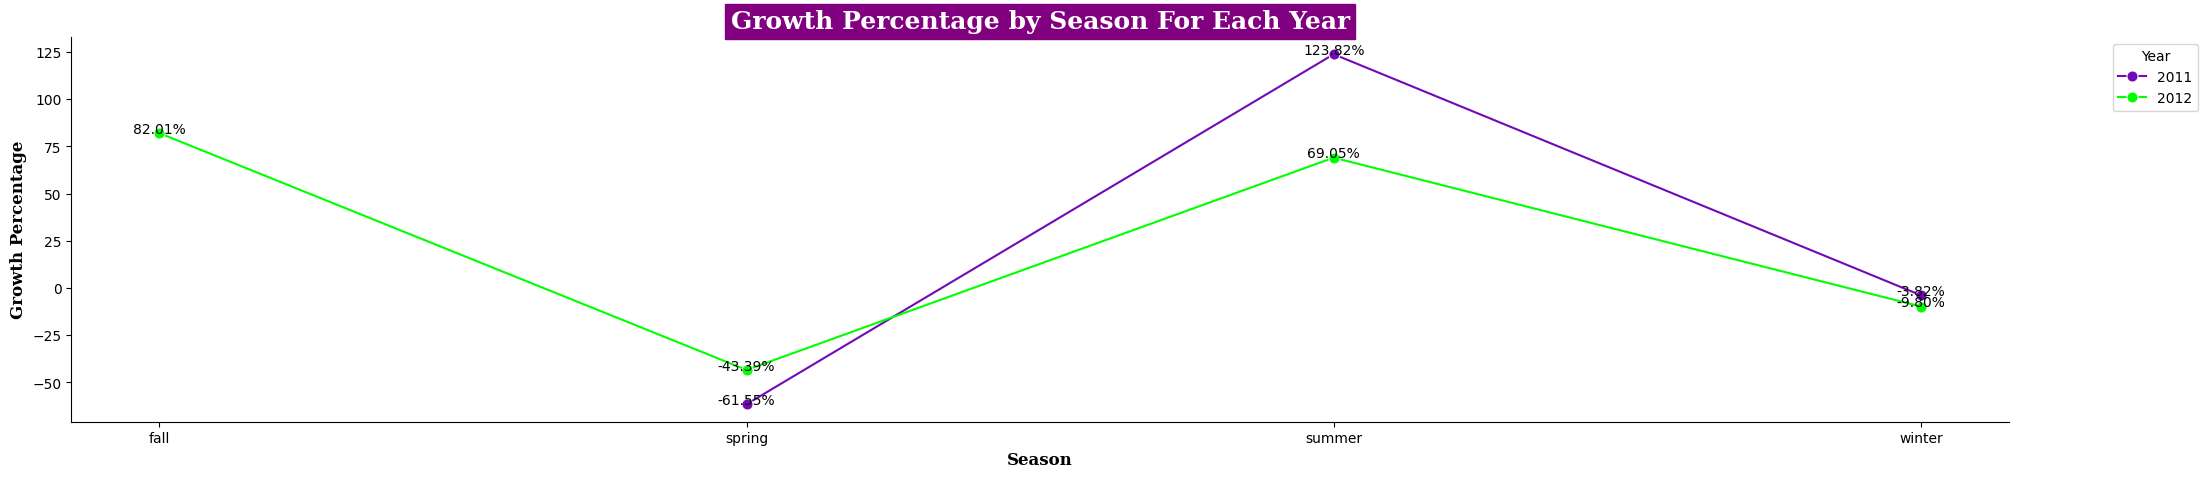

In [ ]:
plt.figure(figsize = (25,5))
sns.lineplot(x='season', y='growth_percentage', hue='datetime', data=yearly_season_avg_tread,marker='o',markersize=8, palette=["#7209B7", "#00FF00"])

# Set plot labels and title
plt.xlabel('Season',fontweight='bold',fontfamily='serif', fontsize = 12)
plt.ylabel('Growth Percentage',fontweight='bold',fontfamily='serif',fontsize = 12)
plt.title('Growth Percentage by Season For Each Year',fontsize=18 ,fontfamily='serif',fontweight='bold',backgroundcolor="purple",color='w')

# adding text in graph
for line in range(0, yearly_season_avg_tread.shape[0]):
    plt.text(yearly_season_avg_tread['season'][line],
             yearly_season_avg_tread['growth_percentage'][line],
             f'{yearly_season_avg_tread["growth_percentage"][line]:.2f}%',
             color='black',
             ha='center')

# Display the legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine(top = True)

plt.show()

### ♈ Insights : -
* **Seasonal Trends:-**

  * ***Summer Peak:*** Across both 2011 and 2012, summer consistently stands out as the peak season for Yulu bike usage. During these periods, the recorded values for bike usage are relatively higher compared to other seasons.

* ***Yearly Growth:***

  * ***2011 Overview:***
      * In 2011, there is a noticeable growth trend from spring to summer  and a subsequent decline in winter  This suggests a significant overall growth in bike usage throughout the year.
  * ***2012 Overview:***
    * In 2012, a similar pattern is observed with a substantial increase from spring to summer  and a slight decrease in winter Again, indicating overall growth in bike usage throughout the year.



##  What is the Average growth percentage of Total rides for each Month Over the years?

### Statical Solution

In [ ]:
x = df.copy()
x['month'] = x['datetime'].dt.month
x['year'] = x['datetime'].dt.year

In [ ]:
monthly_avg_growth = x.groupby(['year', 'month'])['Total_users'].mean().to_frame().reset_index()
monthly_avg_growth['prev_year'] = monthly_avg_growth['Total_users'].shift(1)
monthly_avg_growth['growth_percentage']  = (monthly_avg_growth['Total_users'] - monthly_avg_growth['prev_year'])*100/monthly_avg_growth['prev_year']
monthly_avg_growth

year  month  Total_users   prev_year  growth_percentage
0   2011      1    54.645012         NaN                NaN
1   2011      2    73.641256   54.645012          34.762997
2   2011      3    86.849776   73.641256          17.936305
3   2011      4   111.026374   86.849776          27.837260
4   2011      5   174.809211  111.026374          57.448365
5   2011      6   196.877193  174.809211          12.624039
6   2011      7   203.614035  196.877193           3.421850
7   2011      8   182.666667  203.614035         -10.287782
8   2011      9   174.622517  182.666667          -4.403732
9   2011     10   174.773626  174.622517           0.086535
10  2011     11   155.458333  174.773626         -11.051606
11  2011     12   134.173246  155.458333         -13.691828
12  2012      1   124.353201  134.173246          -7.318929
13  2012      2   145.646154  124.353201          17.122963
14  2012      3   208.276923  145.646154          43.002007
15  2012      4   257.455947  208.276923          23.612325
16  2012      5   264.109649  257.455947           2.584404
17  2012      6   287.186404  264.109649           8.737566
18  2012      7   267.037281  287.186404          -7.016043
19  2012      8   285.570175  267.037281           6.940190
20  2012      9   292.598684  285.570175           2.461219
21  2012     10   280.508772  292.598684          -4.131909
22  2012     11   231.980220  280.508772         -17.300191
23  2012     12   217.054825  231.980220          -6.433909

## Graphical Solution

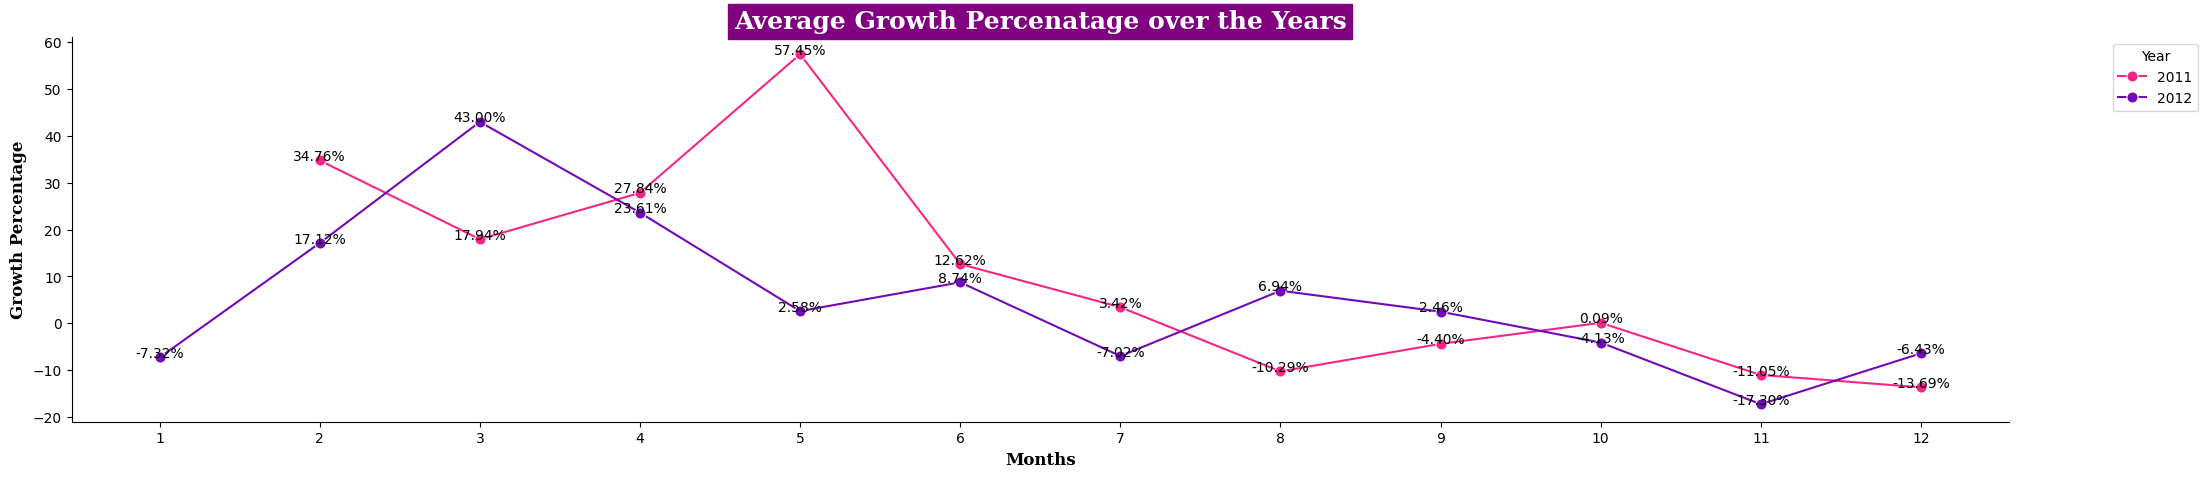

In [ ]:
plt.figure(figsize = (25,5))
plt.title('Average Growth Percenatage over the Years',fontsize=18 ,fontfamily='serif',fontweight='bold',backgroundcolor="purple",color='w')
sns.lineplot(data = monthly_avg_growth , x = 'month' , y = 'growth_percentage', hue='year', marker='o',markersize=8, palette=["#F72585","#7209B7"])


for line in range(0, monthly_avg_growth.shape[0]):
    plt.text(monthly_avg_growth ['month'][line],
             monthly_avg_growth ['growth_percentage'][line],
             f'{monthly_avg_growth ["growth_percentage"][line]:.2f}%',
             color='black',
             ha='center')

plt.xlabel('Months', fontweight='bold',fontfamily='serif',fontsize = 12)
plt.ylabel('Growth Percentage', fontweight='bold',fontfamily='serif',fontsize = 12)
plt.xticks(np.arange(1, 13))

plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top = True)
plt.show()

In [ ]:
monthly_avg_growth['month'] = monthly_avg_growth['month'].map({1: 'January',
                                                               2: 'February',
                                                               3: 'March',
                                                               4: 'April',
                                                               5: 'May',
                                                               6: 'June',
                                                               7: 'July',
                                                               8: 'August',
                                                               9: 'September',
                                                               10: 'October',
                                                               11: 'November',
                                                               12: 'December'})


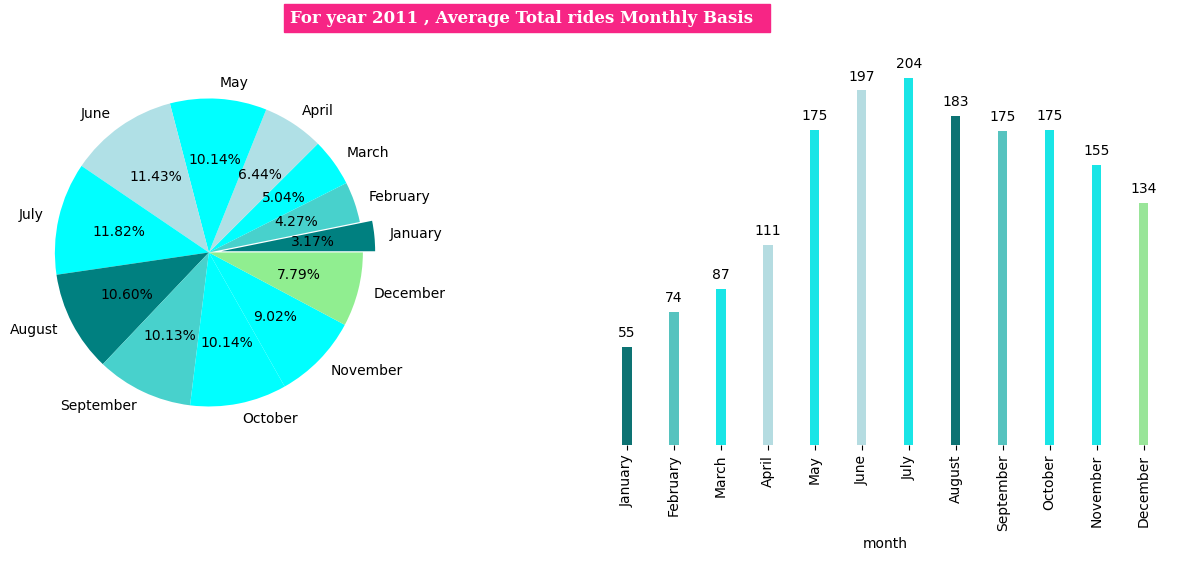

In [ ]:
plt.figure(figsize=(16, 5))
monthly_avg_growth_2011 = monthly_avg_growth.loc[monthly_avg_growth['year'] == 2011]
plt.suptitle('For year 2011 , Average Total rides Monthly Basis  ',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')
c = ['teal' , 'mediumturquoise' , 'aqua' , 'powderblue' , 'aqua' , 'powderblue' , 'cyan' , 'teal','mediumturquoise' , 'aqua' ,'cyan','lightgreen']
plt.subplot(121)
plt.pie(data=monthly_avg_growth_2011, x=monthly_avg_growth_2011['Total_users'], colors=c,labels=monthly_avg_growth_2011['month'],
          explode=(0.08,0,0,0,0,0,0,0,0,0,0,0), autopct='%0.2f%%')


plt.subplot(122)
ax=sns.barplot(data=monthly_avg_growth_2011,y=monthly_avg_growth_2011['Total_users'],x=monthly_avg_growth_2011['month'],palette=c,width=0.2,saturation=0.8)

# Add rounded text annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True,bottom=True)
plt.xticks(rotation = 90)
plt.yticks([])
plt.ylabel(None)
plt.show()


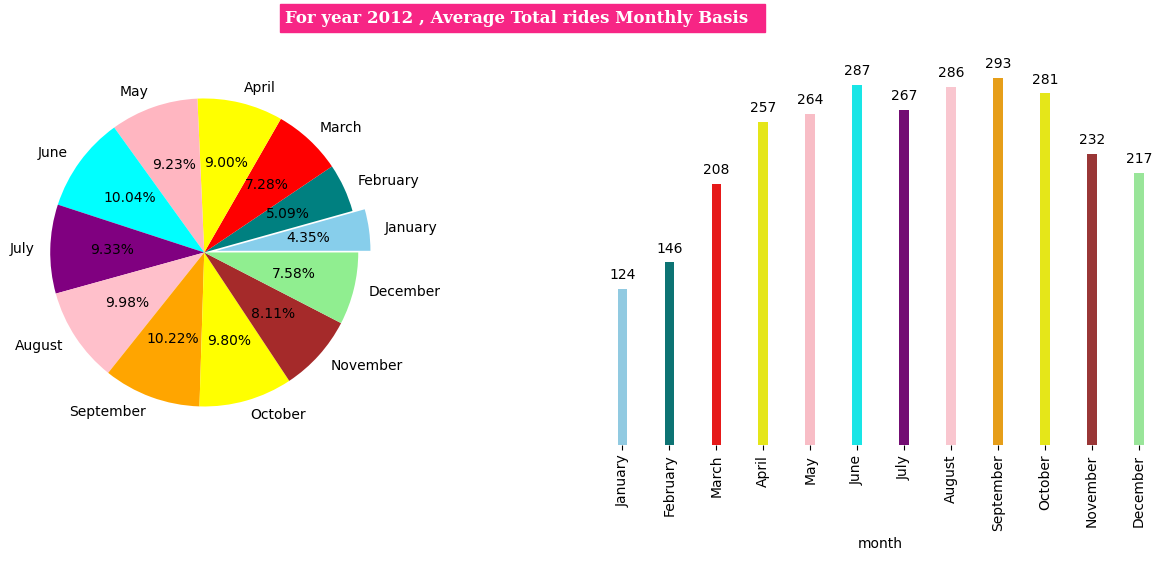

In [ ]:
plt.figure(figsize=(16, 5))
monthly_avg_growth_2012 = monthly_avg_growth.loc[monthly_avg_growth['year'] == 2012]
plt.suptitle('For year 2012 , Average Total rides Monthly Basis  ',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')
c = ['skyblue' , 'teal' , 'red' , 'yellow' , 'lightpink' , 'cyan' , 'purple' , 'pink','orange' , 'yellow' ,'brown','lightgreen']
plt.subplot(121)
plt.pie(data=monthly_avg_growth_2012, x=monthly_avg_growth_2012['Total_users'], colors=c,labels=monthly_avg_growth_2012['month'],
          explode=(0.08,0,0,0,0,0,0,0,0,0,0,0), autopct='%0.2f%%')


plt.subplot(122)
ax=sns.barplot(data=monthly_avg_growth_2012,y=monthly_avg_growth_2012['Total_users'],x=monthly_avg_growth_2012['month'],palette=c,width=0.2,saturation=0.8)

# Add rounded text annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True,bottom=True)
plt.xticks(rotation = 90)
plt.yticks([])
plt.ylabel(None)
plt.show()


## Insights

##  Graph of  Average Total rides for Houly Basis?

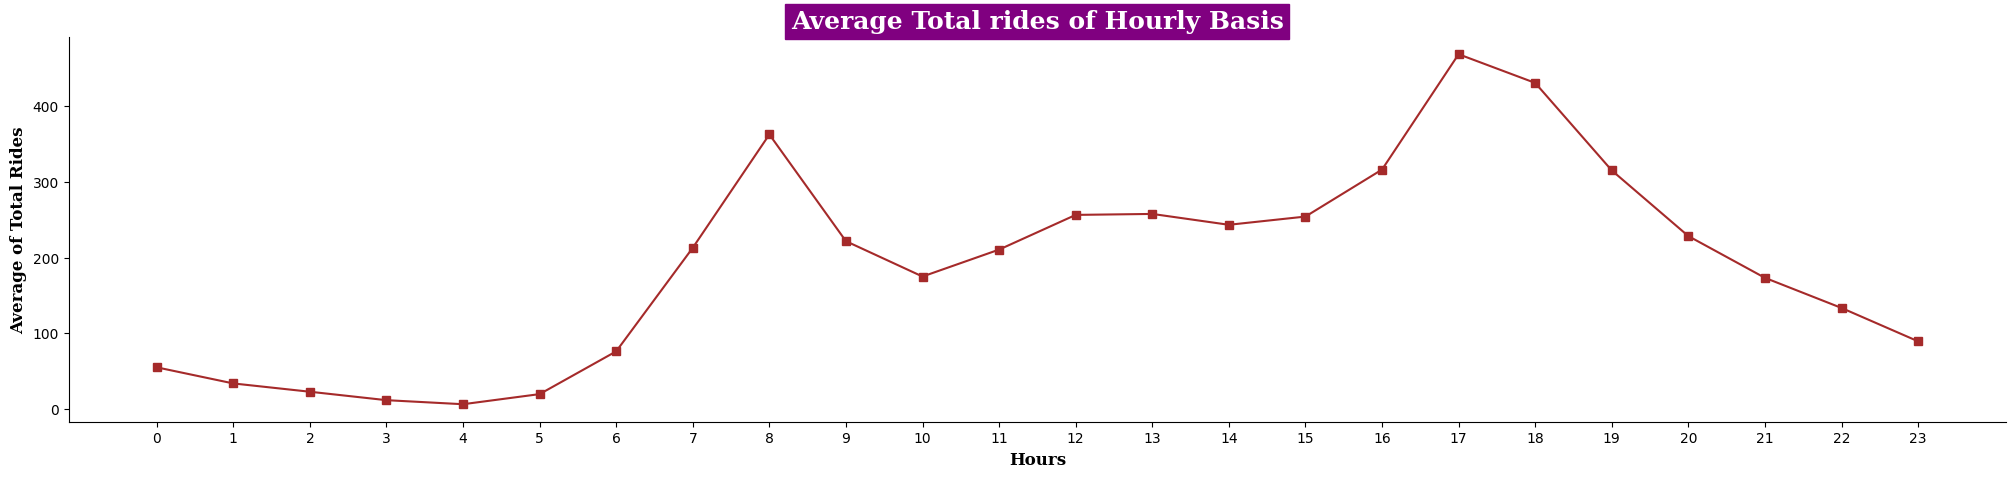

In [ ]:
plt.figure(figsize = (25,5))
plt.title('Average Total rides of Hourly Basis',fontsize=18 ,fontfamily='serif',fontweight='bold',backgroundcolor="purple",color='w')
df.groupby(df['datetime'].dt.hour)['Total_users'].mean().plot(kind = 'line', marker = 's' , color = 'brown')
plt.xlabel('Hours', fontweight='bold',fontfamily='serif',fontsize = 12)
plt.ylabel('Average of Total Rides', fontweight='bold',fontfamily='serif',fontsize = 12)
plt.xticks(np.arange(0, 24))
sns.despine(top = True)
plt.show()

## For 2011 Average Total Rides on Houly basis per month

In [ ]:
# For year 2011
x = df.copy()
x['hour'] = x['datetime'].dt.hour
x['year'] = x['datetime'].dt.year
x['month'] = x['datetime'].dt.month


In [ ]:
avg_rides = x.groupby(['year','month','hour'])['Total_users'].mean().reset_index()

In [ ]:
avg_rides_2011 = avg_rides.loc[avg_rides['year']== 2011].reset_index(drop = True)

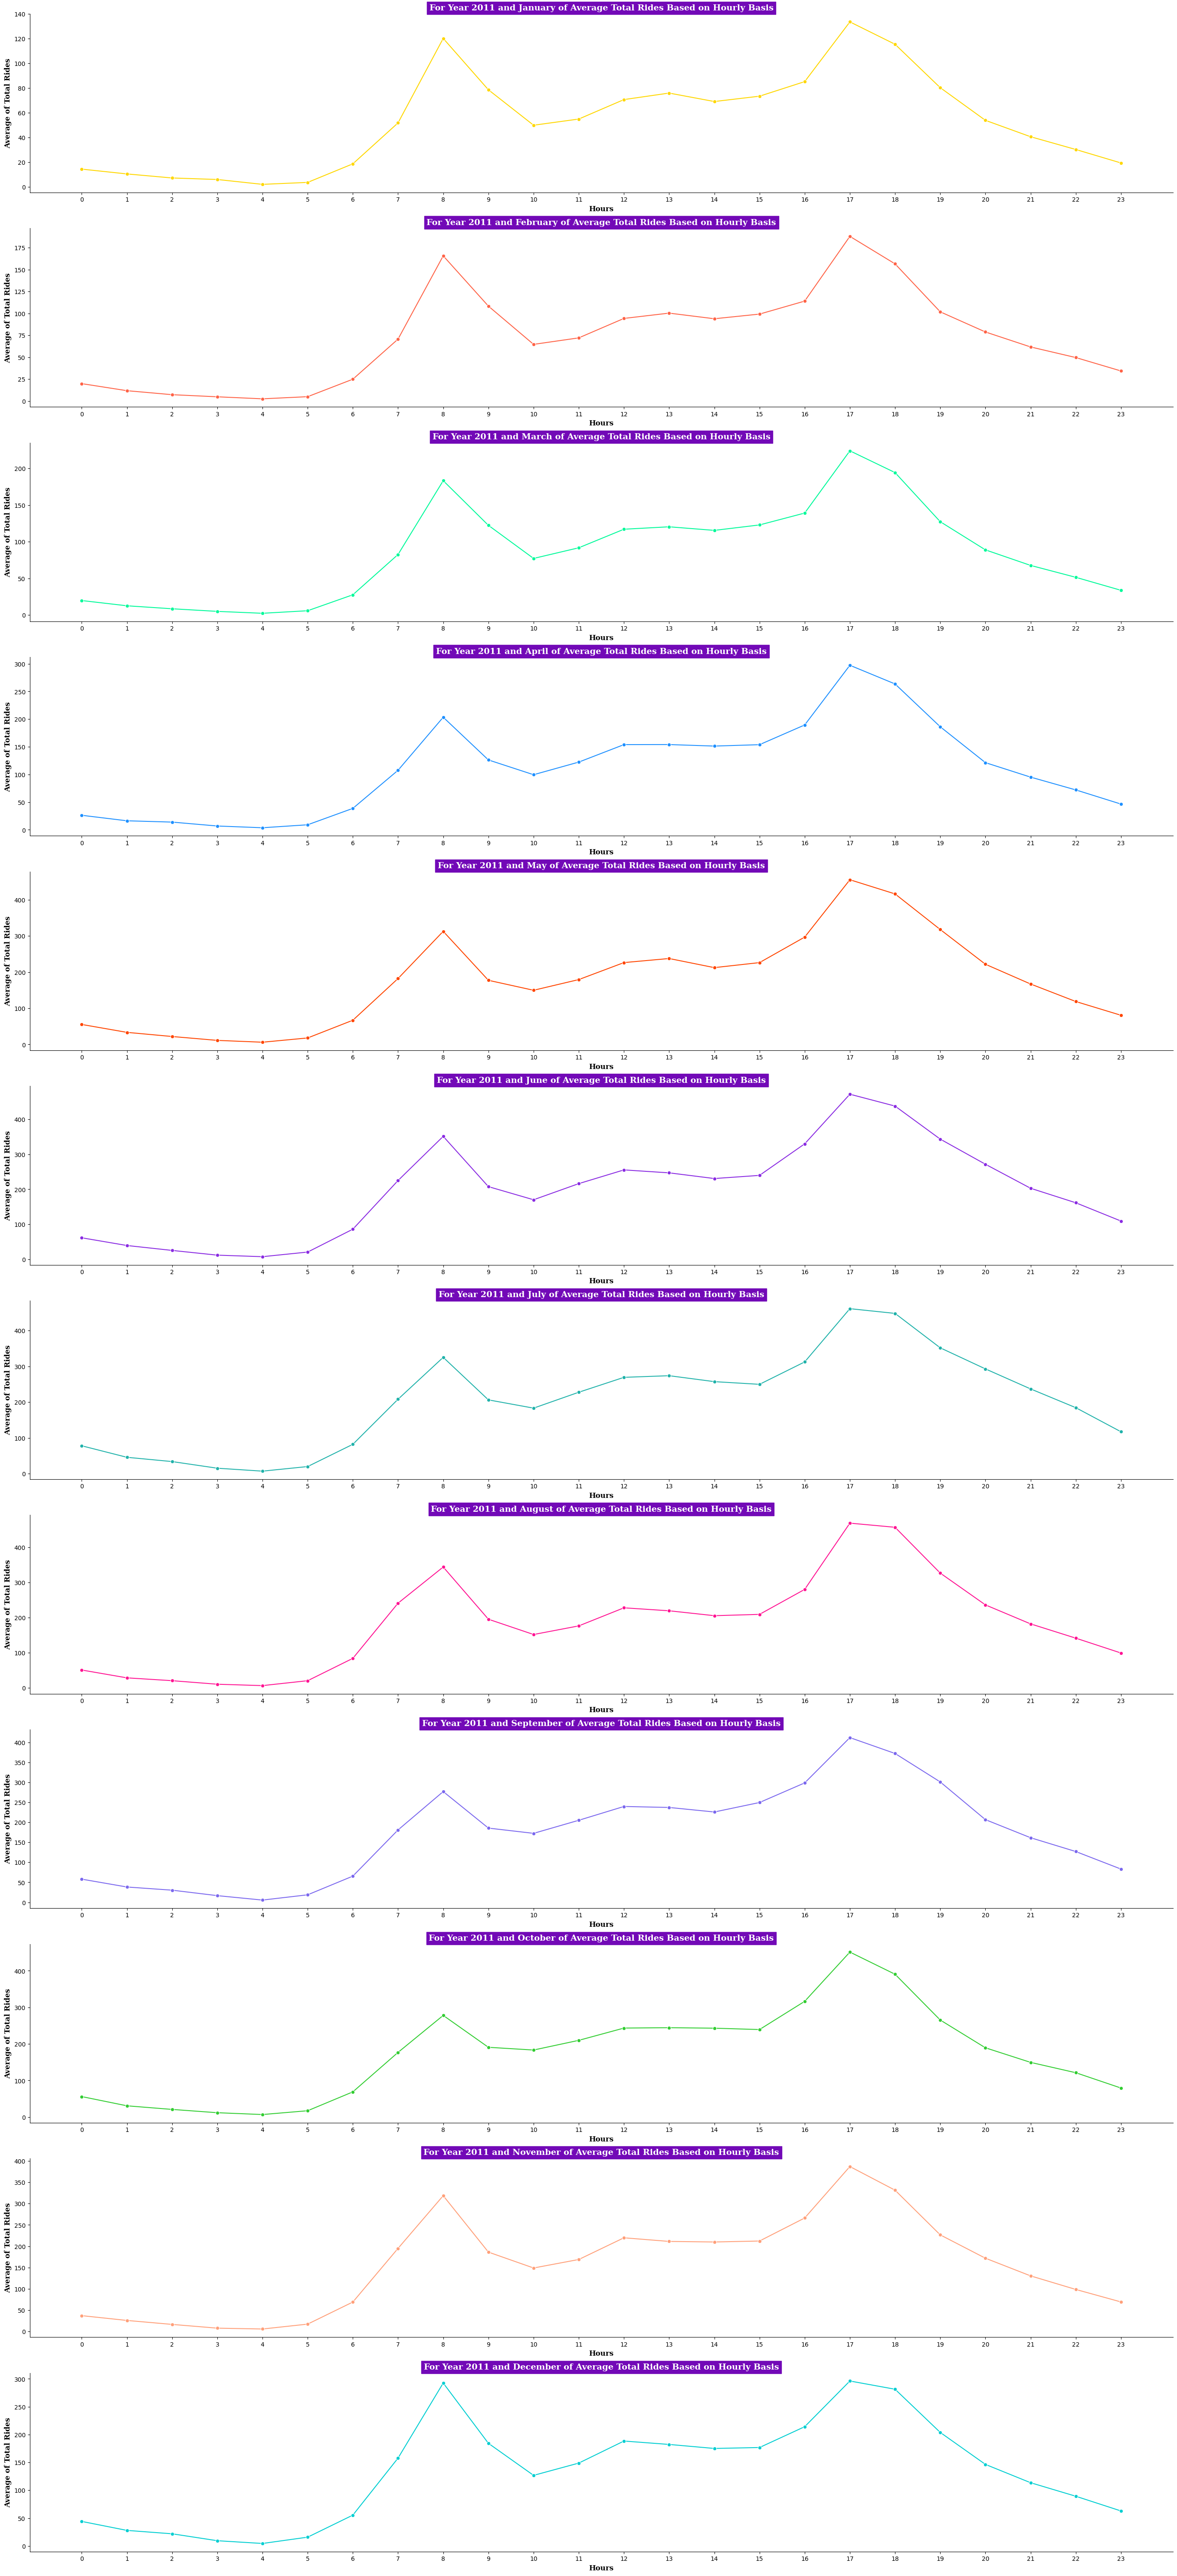

In [ ]:
c = ['#FFD700', '#FF6347', '#00FA9A', '#1E90FF', '#FF4500', '#8A2BE2', '#20B2AA', '#FF1493', '#7B68EE', '#32CD32', '#FFA07A', '#00CED1']

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(34, 76))  # Increase the height of the overall figure

for i in range(1, 13):
    plt.subplot(12, 1, i)

    avg_rides_2011_month_i = avg_rides_2011[avg_rides_2011['month'] == i]
    ax = sns.lineplot(data=avg_rides_2011_month_i, x='hour', y='Total_users', marker='o', color=c[i - 1])

    plt.title(f'For Year 2011 and {months[i-1]} of Average Total Rides Based on Hourly Basis', fontsize=14, fontfamily='serif', fontweight='bold', backgroundcolor="#7209B7", color='w')
    plt.xlabel('Hours', fontweight='bold', fontfamily='serif', fontsize=12)
    plt.ylabel('Average of Total Rides', fontweight='bold', fontfamily='serif', fontsize=12)

    plt.xticks(np.arange(0, 24))
    sns.despine(top=True)

plt.show()


## For 2012 Average Total Rides on Houly basis per month

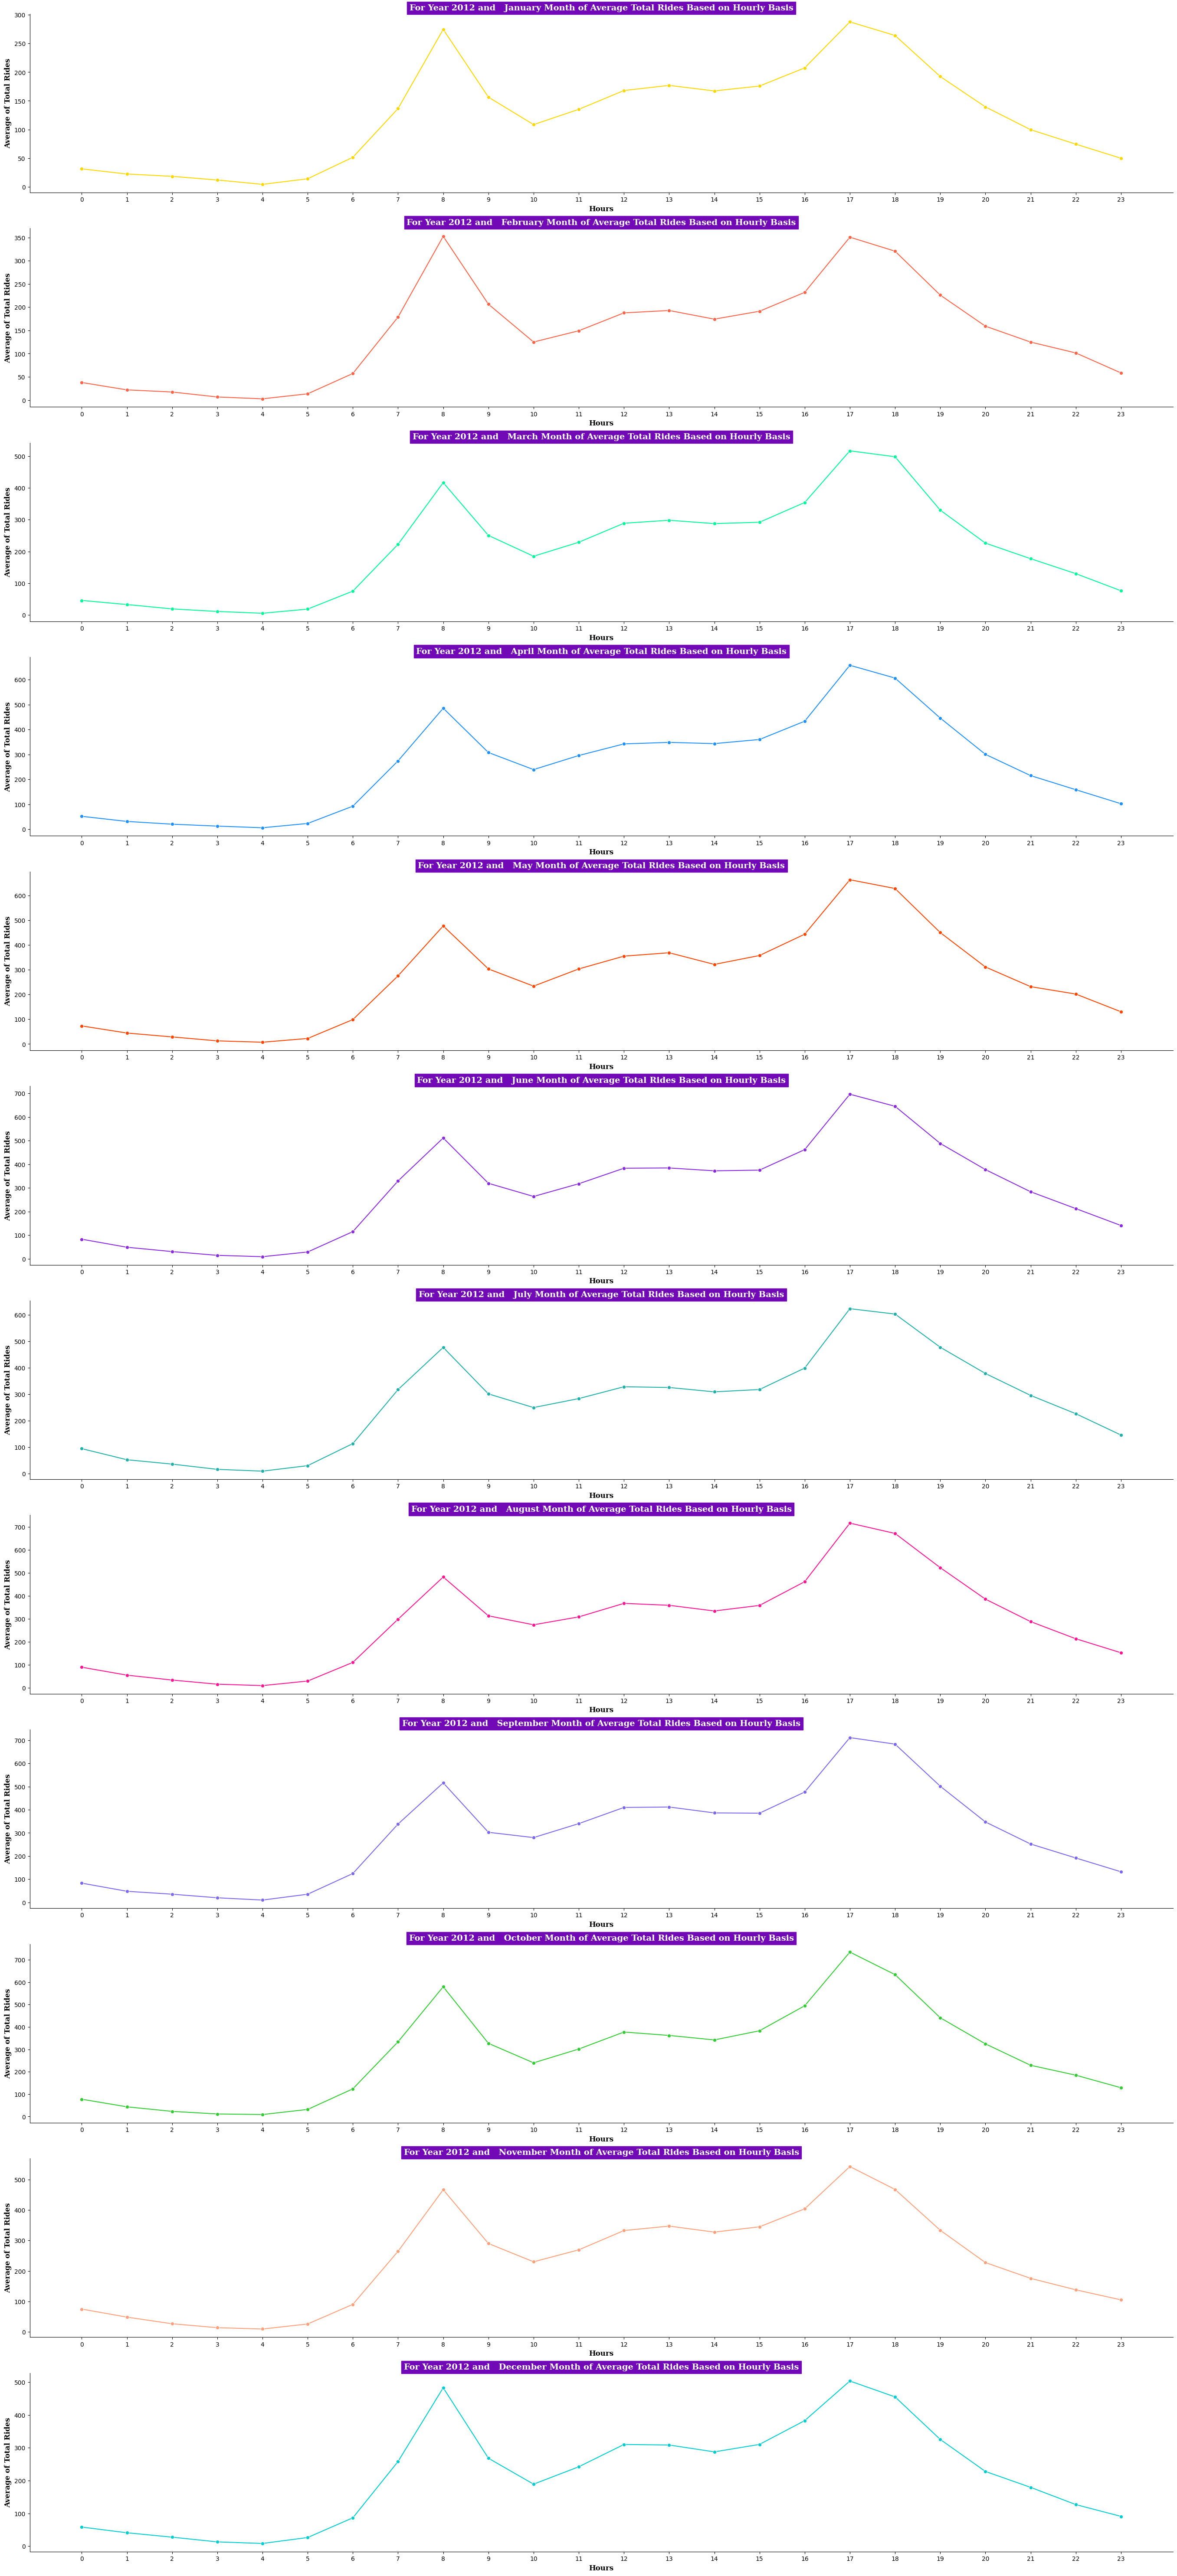

In [ ]:
avg_rides_2012 = avg_rides.loc[avg_rides['year']== 2012].reset_index(drop = True)
c = ['#FFD700', '#FF6347', '#00FA9A', '#1E90FF', '#FF4500', '#8A2BE2', '#20B2AA', '#FF1493', '#7B68EE', '#32CD32', '#FFA07A', '#00CED1']

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(34, 76))  # Increase the height of the overall figure

for i in range(1, 13):
    plt.subplot(12, 1, i)

    avg_rides_2012_month_i = avg_rides_2012[avg_rides_2012['month'] == i]
    ax = sns.lineplot(data=avg_rides_2012_month_i, x='hour', y='Total_users', marker='o', color=c[i - 1])

    plt.title(f'For Year 2012 and   {months[i-1]} Month of Average Total Rides Based on Hourly Basis', fontsize=14, fontfamily='serif', fontweight='bold', backgroundcolor="#7209B7", color='w')
    plt.xlabel('Hours', fontweight='bold', fontfamily='serif', fontsize=12)
    plt.ylabel('Average of Total Rides', fontweight='bold', fontfamily='serif', fontsize=12)

    plt.xticks(np.arange(0, 24))
    sns.despine(top=True)

plt.show()

# day Wise Distribution  average rides

In [ ]:
day_wise_total_rides = df.groupby(df['datetime'].dt.day_name())['Total_users'].mean().reset_index()
day_wise_total_rides

datetime  Total_users
0     Friday   197.844343
1     Monday   190.390716
2   Saturday   196.665404
3     Sunday   180.839772
4   Thursday   197.296201
5    Tuesday   189.723847
6  Wednesday   188.411348

In [ ]:
# c = ['orchid', 'lightcoral', 'darkseagreen', 'burlywood', 'palevioletred', 'orchid', 'lightcoral', 'darkseagreen', 'burlywood', 'palevioletred']

In [ ]:
c = ['firebrick', 'mediumslateblue', 'cadetblue',  'orchid', 'lightcoral', 'darkseagreen' , 'mediumturquoise']

In [ ]:
#  c = ['teal' , 'mediumturquoise' , 'aqua' , 'powderblue' , 'cyan' , 'firebrick' , 'lightpink' , 'lightorange' , 'burlywood']

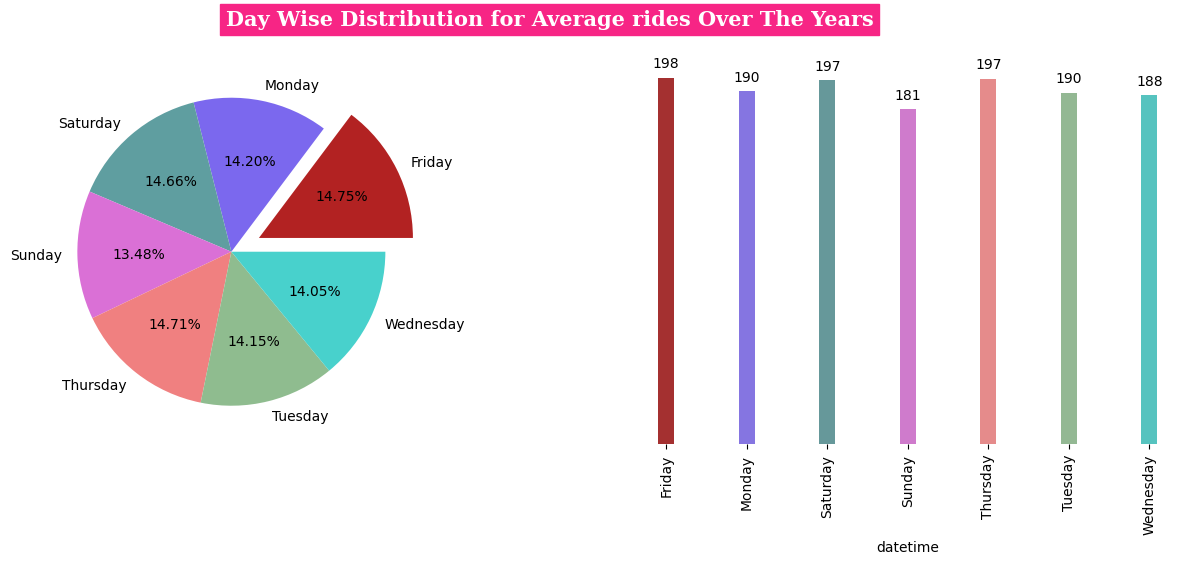

In [ ]:
plt.figure(figsize=(16, 5))
plt.suptitle('Day Wise Distribution for Average rides Over The Years',fontsize=15,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')
c = ['firebrick', 'mediumslateblue', 'cadetblue',  'orchid', 'lightcoral', 'darkseagreen' , 'mediumturquoise']

plt.subplot(121)
plt.pie(data=day_wise_total_rides, x=day_wise_total_rides['Total_users'], colors=c,labels=day_wise_total_rides['datetime'],
        explode=(0.2,0,0,0,0,0,0), autopct='%0.2f%%')

plt.subplot(122)
ax = sns.barplot(data=day_wise_total_rides, y='Total_users', x='datetime', palette=c, width=0.2,saturation=0.8)


# Add rounded text annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True,bottom=True)
plt.xticks(rotation = 90)
plt.yticks([])
plt.ylabel(None)
plt.show()




In [ ]:
x = df.copy()
x['year'] = x['datetime'].dt.year
x['day'] = x['datetime'].dt.day_name()

In [ ]:
day_wise_rides = x.groupby(['year','day'])['Total_users'].mean().reset_index()

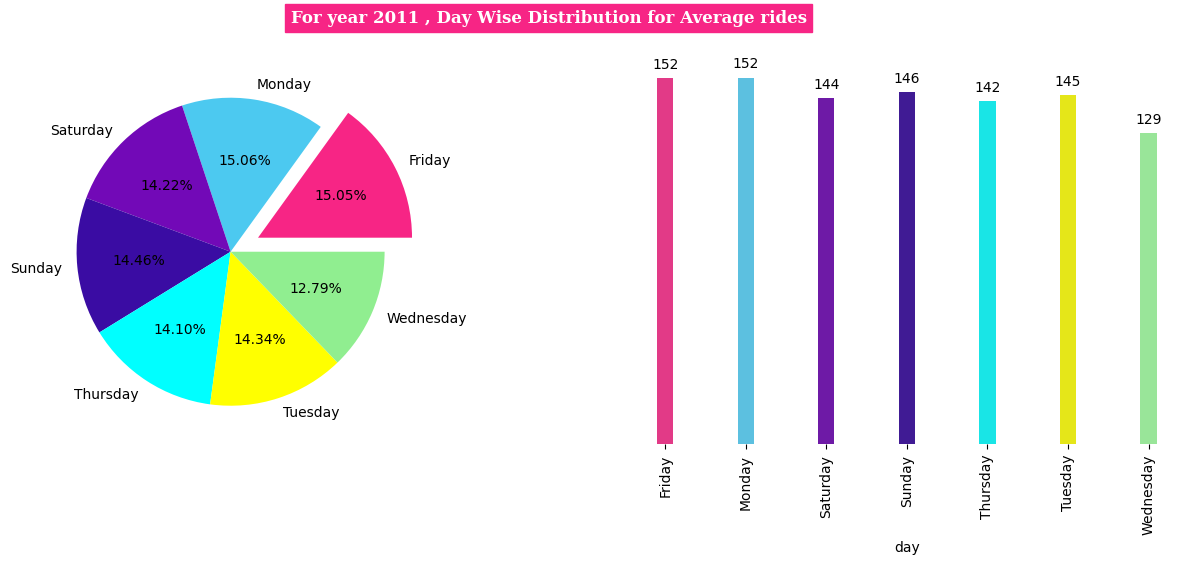

In [ ]:
day_wise_rides_2011 = day_wise_rides.loc[day_wise_rides['year'] == 2011]
c = ["#F72585", "#4CC9F0","#7209B7", "#3A0CA3" , 'cyan' , 'yellow' , 'lightgreen' ]

plt.figure(figsize=(16, 5))
plt.suptitle('For year 2011 , Day Wise Distribution for Average rides',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')
plt.subplot(121)
plt.pie(data=day_wise_rides_2011, x=day_wise_rides_2011['Total_users'], colors=c,labels=day_wise_rides_2011['day'],
        explode=(0.2,0,0,0,0,0,0), autopct='%0.2f%%')

plt.subplot(122)
ax = sns.barplot(data=day_wise_rides_2011, y='Total_users', x='day', palette=c, width=0.2,saturation=0.8)

# Add rounded text annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True,bottom=True)
plt.xticks(rotation = 90)
plt.yticks([])
plt.ylabel(None)
plt.show()


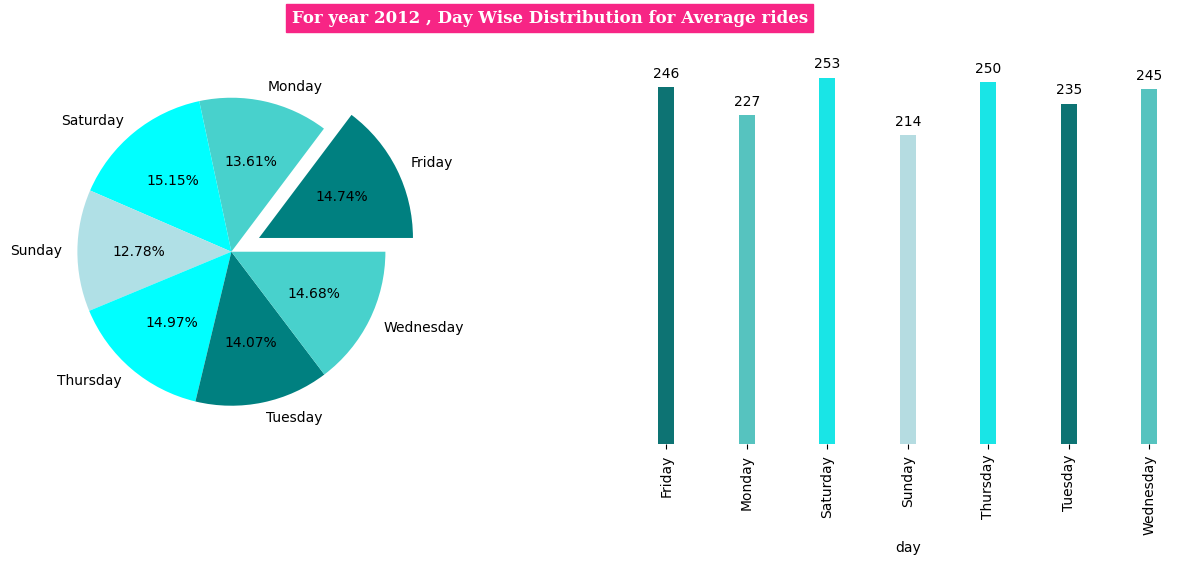

In [ ]:
day_wise_rides_2012 = day_wise_rides.loc[day_wise_rides['year'] == 2012]
c = ['teal' , 'mediumturquoise' , 'aqua' , 'powderblue' , 'cyan' , 'teal' , 'mediumturquoise' ]

plt.figure(figsize=(16, 5))
plt.suptitle('For year 2012 , Day Wise Distribution for Average rides',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')
plt.subplot(121)
plt.pie(data=day_wise_rides_2012, x=day_wise_rides_2012['Total_users'], colors=c,labels=day_wise_rides_2012['day'],
        explode=(0.2,0,0,0,0,0,0), autopct='%0.2f%%')

plt.subplot(122)
ax = sns.barplot(data=day_wise_rides_2012, y='Total_users', x='day', palette=c, width=0.2,saturation=0.8)


# Add rounded text annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True,bottom=True)
plt.xticks(rotation = 90)
plt.yticks([])
plt.ylabel(None)
plt.show()

plt.show()


In [ ]:
x  = df.copy()

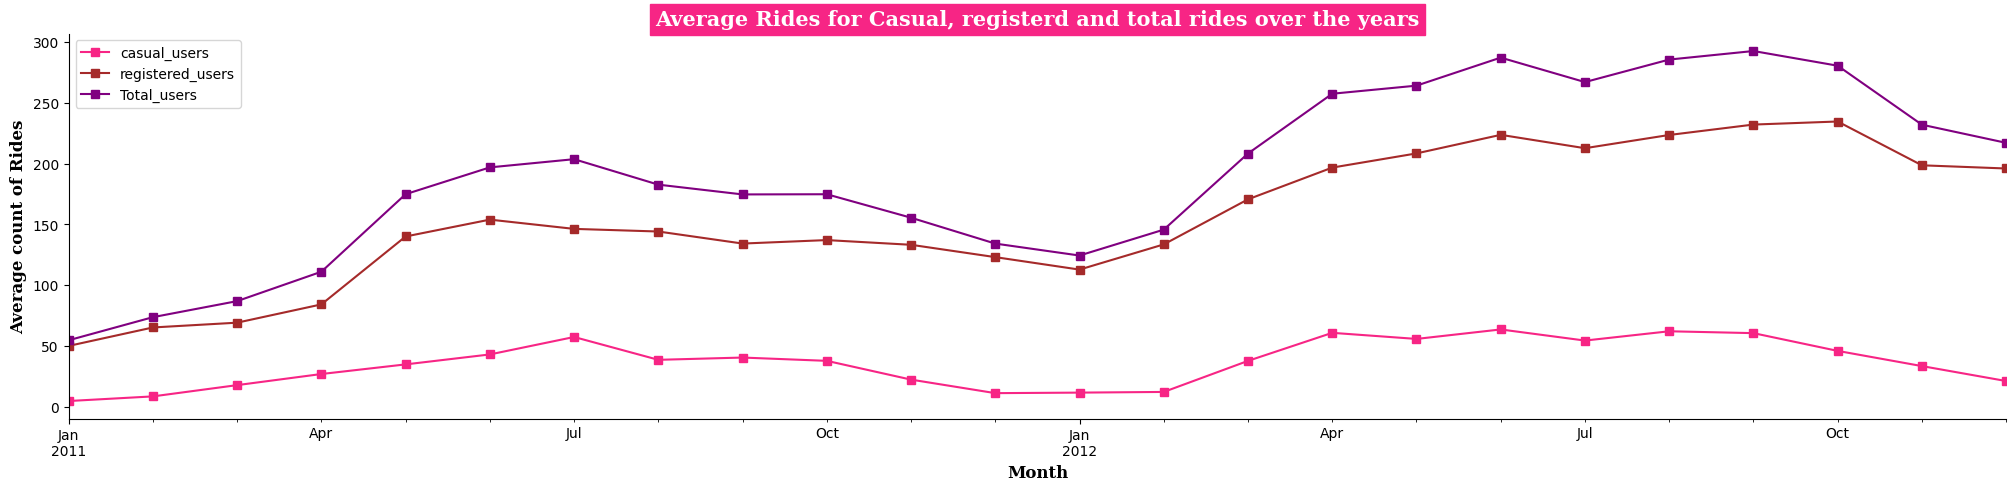

In [ ]:
x = x.set_index(df['datetime'])
plt.figure(figsize = (25,5))
plt.title('Average Rides for Casual, registerd and total rides over the years',fontsize=15,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')
x.resample('M')['casual_users'].mean().plot(kind ='line', marker = 's' ,legend = 'casual',color = "#F72585")
x.resample('M')['registered_users'].mean().plot(kind ='line', marker = 's' ,legend = 'registered', color = 'brown')
x.resample('M')['Total_users'].mean().plot(kind ='line', marker = 's' ,legend = 'Total Rides', color = 'purple')
plt.xlabel('Month', fontweight='bold',fontfamily='serif',fontsize = 12)
plt.ylabel('Average count of Rides', fontweight='bold',fontfamily='serif',fontsize = 12)
sns.despine(top = True)
plt.show()

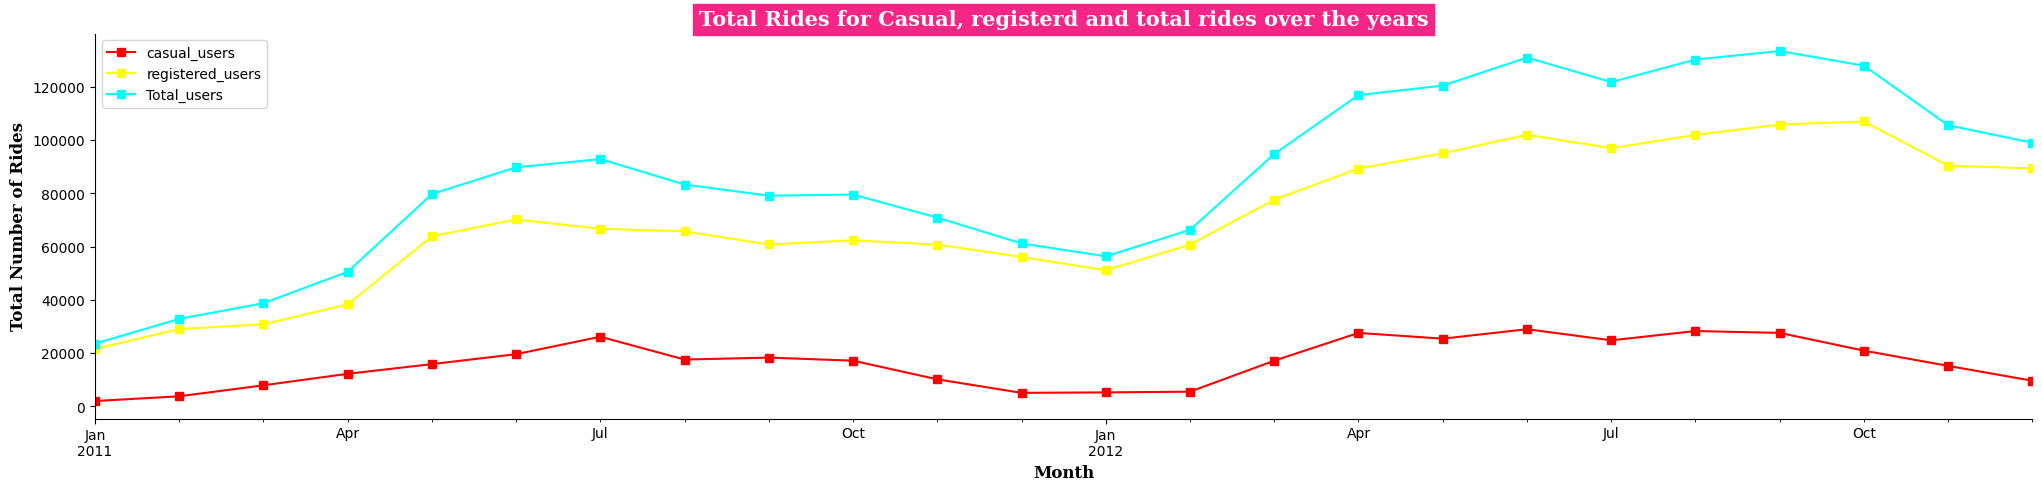

In [ ]:
x = x.set_index(df['datetime'])
plt.figure(figsize = (25,5))
x.resample('M')['casual_users'].sum().plot(kind ='line', marker = 's' ,legend = 'casual',color = "red")
x.resample('M')['registered_users'].sum().plot(kind ='line', marker = 's' ,legend = 'registered', color = 'yellow')
x.resample('M')['Total_users'].sum().plot(kind ='line', marker = 's' ,legend = 'Total Rides', color = 'cyan')
plt.xlabel('Month', fontweight='bold',fontfamily='serif',fontsize = 12)
plt.ylabel('Total Number of Rides', fontweight='bold',fontfamily='serif',fontsize = 12)
plt.title('Total Rides for Casual, registerd and total rides over the years',fontsize=15,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')
sns.despine(top = True)
plt.show()

# Bivariate Analysis

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'feeling_temperature', 'humidity', 'windspeed', 'casual_users',
       'registered_users', 'Total_users', 'Hourly'],
      dtype='object')

## Box plot for each categorical column with total rides

<ipython-input-55-79073862950c>:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data = df, x = cat_col[i], y ='Total_users', palette = c )
<ipython-input-55-79073862950c>:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data = df, x = cat_col[i], y ='Total_users', palette = c )


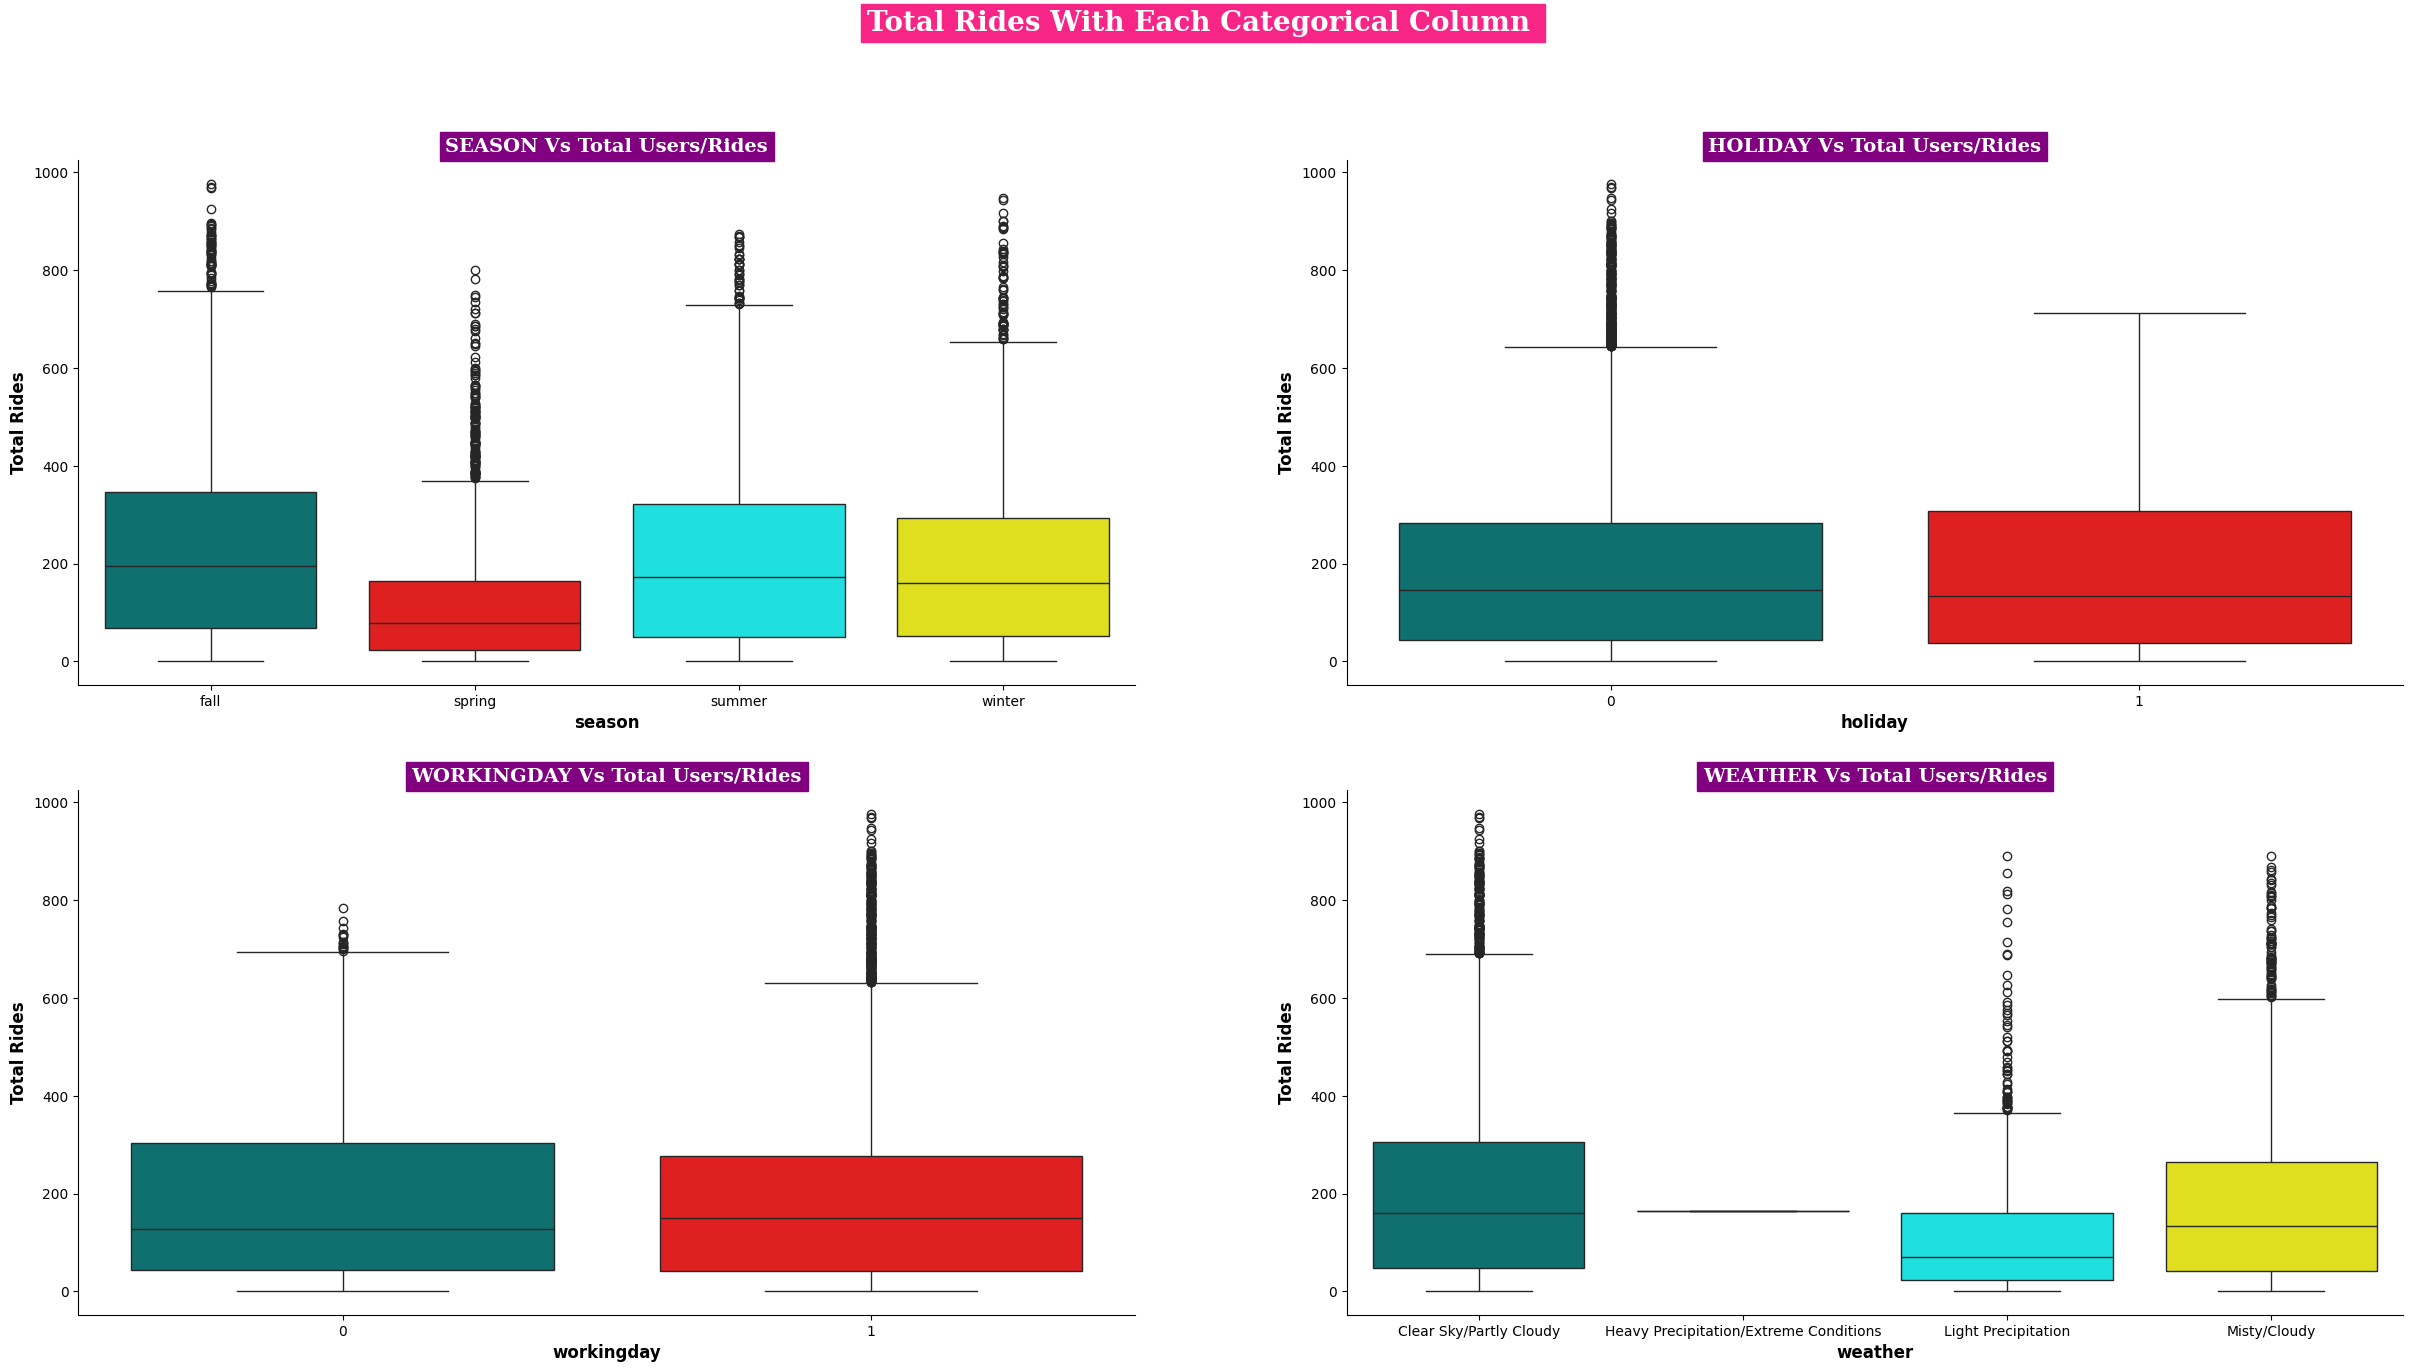

In [ ]:
cat_col = ['season', 'holiday', 'workingday', 'weather']
plt.figure(figsize=(30,15))
c = ["teal", "red", 'cyan' , 'yellow' ]
plt.suptitle('Total Rides With Each Categorical Column ',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')

for i in range(0, 4):
  plt.subplot(2, 2, i+1)
  sns.boxplot(data = df, x = cat_col[i], y ='Total_users', palette = c )
  plt.title(f'{cat_col[i].upper()} Vs Total Users/Rides',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="purple",color='w' )
  plt.xlabel(f'{cat_col[i]}',fontsize=12,fontweight='bold')
  plt.ylabel('Total Rides', fontsize=12,fontweight='bold')
  sns.despine()

plt.show()

In [ ]:
x = df.copy()
x['year'] = x['datetime'].dt.year
x['day_name'] = x['datetime'].dt.day_name()

<ipython-input-57-3370705577dc>:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=x, y='season', x='Total_users', hue=hue_col[i], palette=c, saturation=0.8,errorbar=None)
<ipython-input-57-3370705577dc>:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=x, y='season', x='Total_users', hue=hue_col[i], palette=c, saturation=0.8,errorbar=None)
<ipython-input-57-3370705577dc>:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=x, y='season', x='Total_users', hue=hue_col[i], palette=c, saturation=0.8,errorbar=None)
<ipython-input-57-3370705577dc>:11: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  sns.barplot(data=x, y='season', x='Total_users', hue=hue_col[i], palette=c, saturation=0.8,errorbar=None)


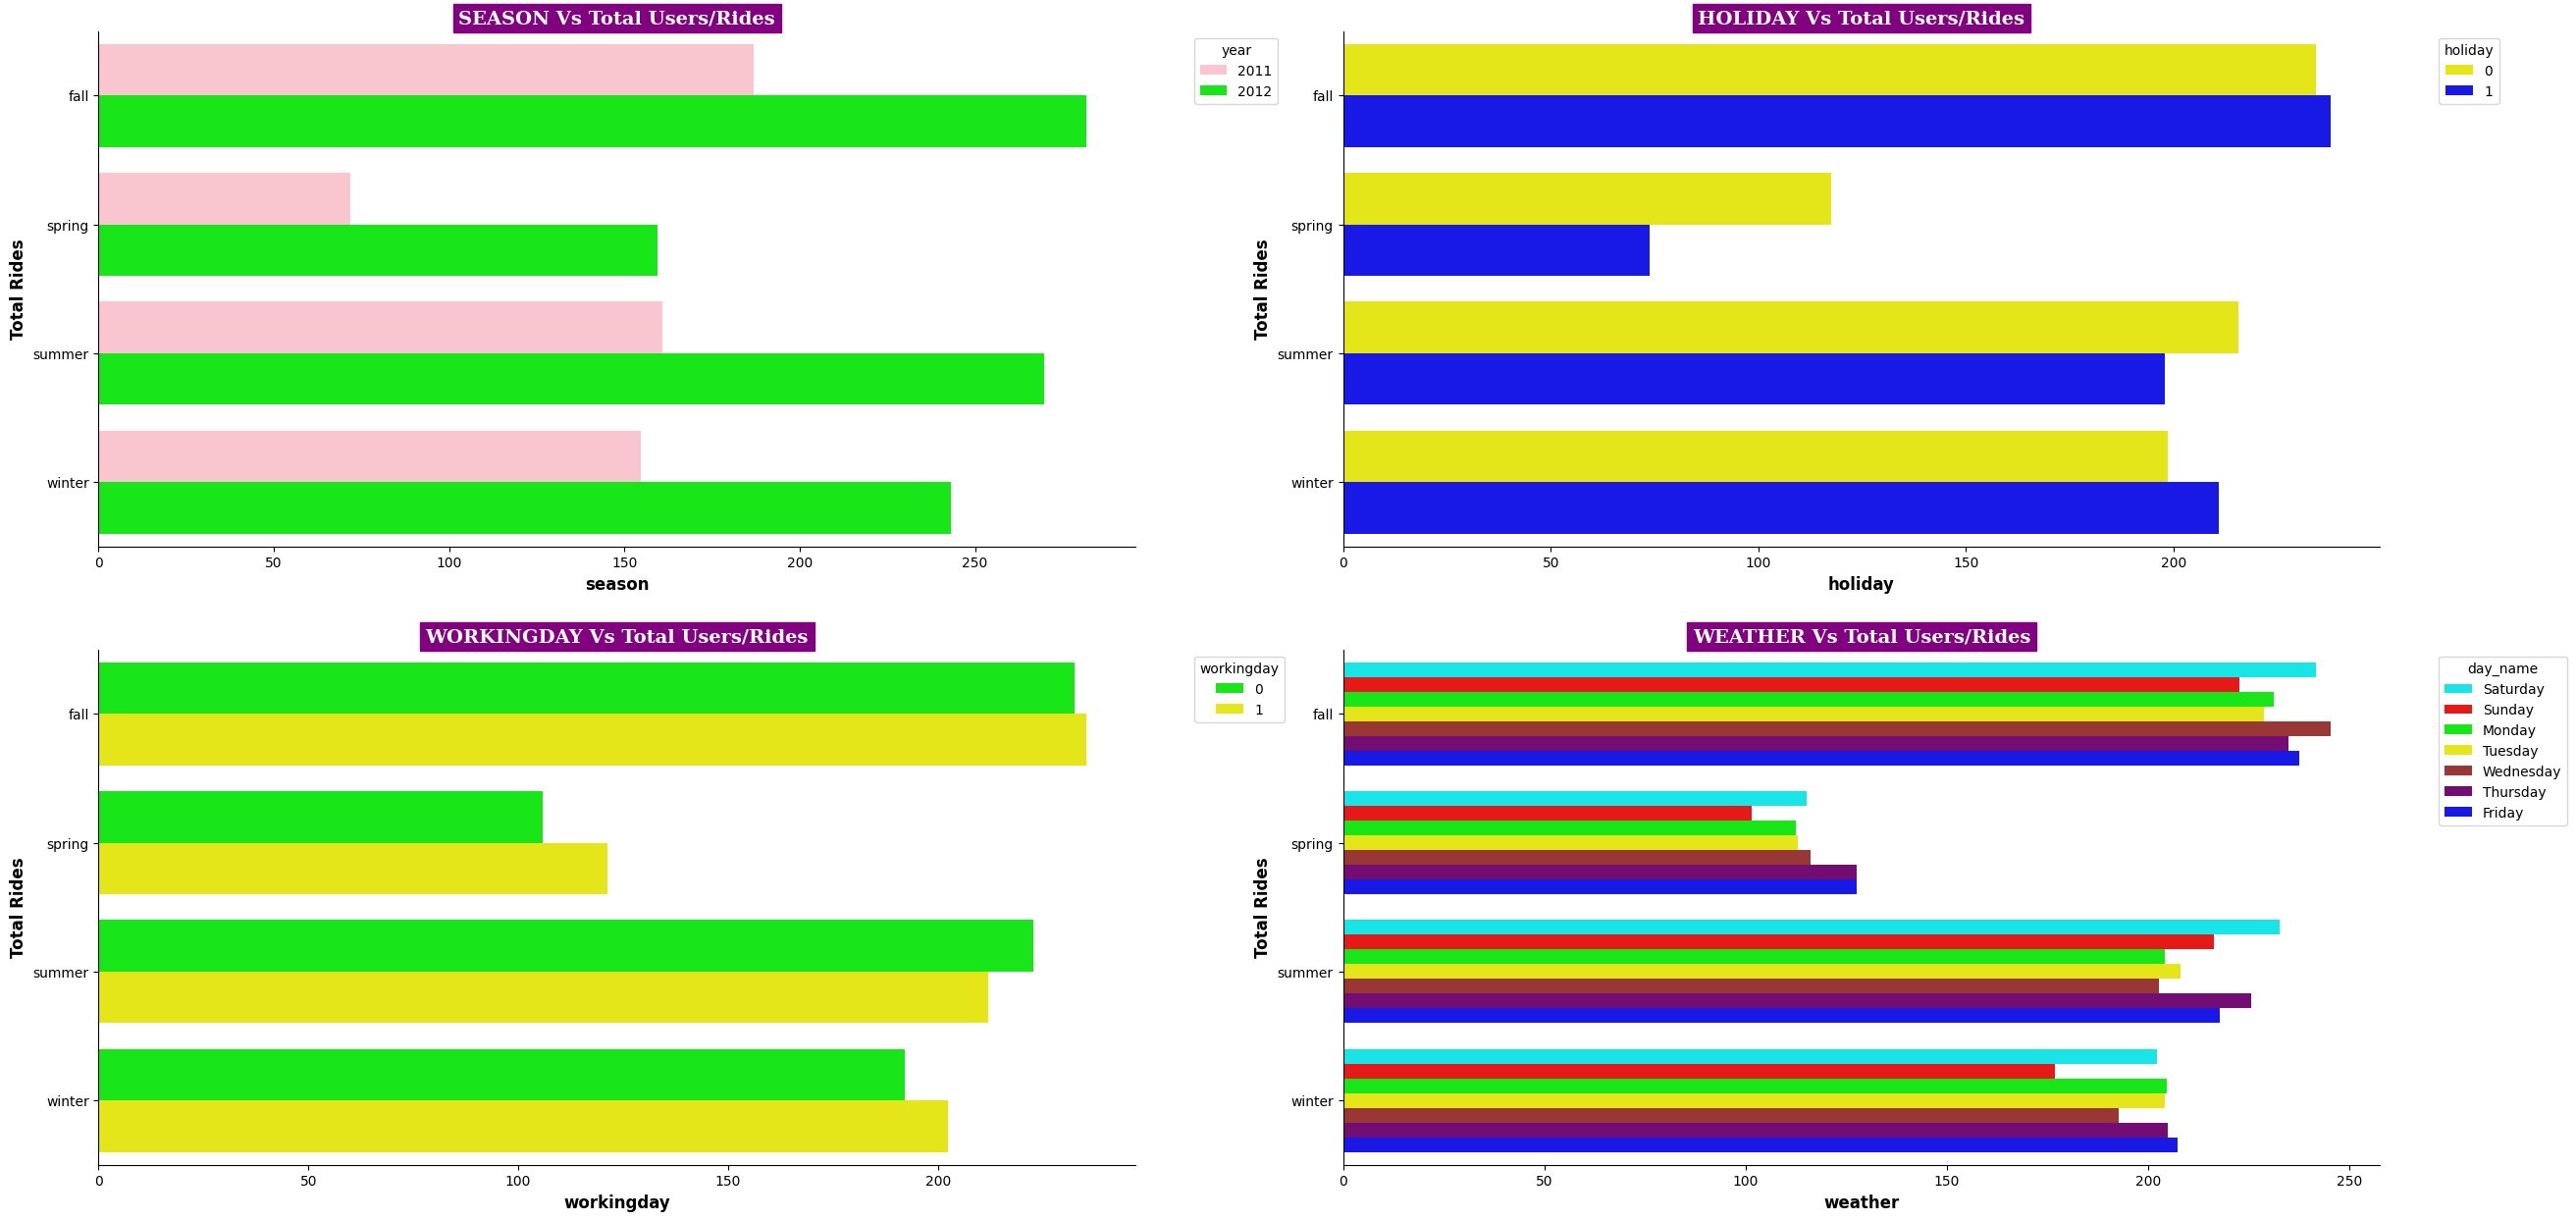

In [ ]:
import random
hue_col = ['year', 'holiday', 'workingday', 'day_name']
plt.figure(figsize=(30, 15))
c = ["silver", "red", 'cyan', 'yellow', 'purple', 'lime', 'blue', 'pink', 'brown']

# plt.suptitle('Total Rides For Season With respect to Year', 'Holiday', 'Workingday', 'Day_Name'', fontsize=20, fontfamily='serif', fontweight='bold', backgroundcolor="#F72585", color='w')

for i in range(0, 4):
    plt.subplot(2, 2, i+1)
    random.shuffle(c) # Shuffle the colors
    sns.barplot(data=x, y='season', x='Total_users', hue=hue_col[i], palette=c, saturation=0.8,errorbar=None)
    plt.legend(title=f'{hue_col[i]}', bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.despine()
    plt.ylabel(None)
    plt.title(f'{cat_col[i].upper()} Vs Total Users/Rides',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="purple",color='w' )
    plt.xlabel(f'{cat_col[i]}',fontsize=12,fontweight='bold')
    plt.ylabel('Total Rides', fontsize=12,fontweight='bold')
    sns.despine()

plt.show()


<ipython-input-58-79f7fb459837>:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data = x, y = cat_col[i], x ='Total_users', hue = hue_col[i+1],palette = c )
<ipython-input-58-79f7fb459837>:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data = x, y = cat_col[i], x ='Total_users', hue = hue_col[i+1],palette = c )


IndexError: list index out of range

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


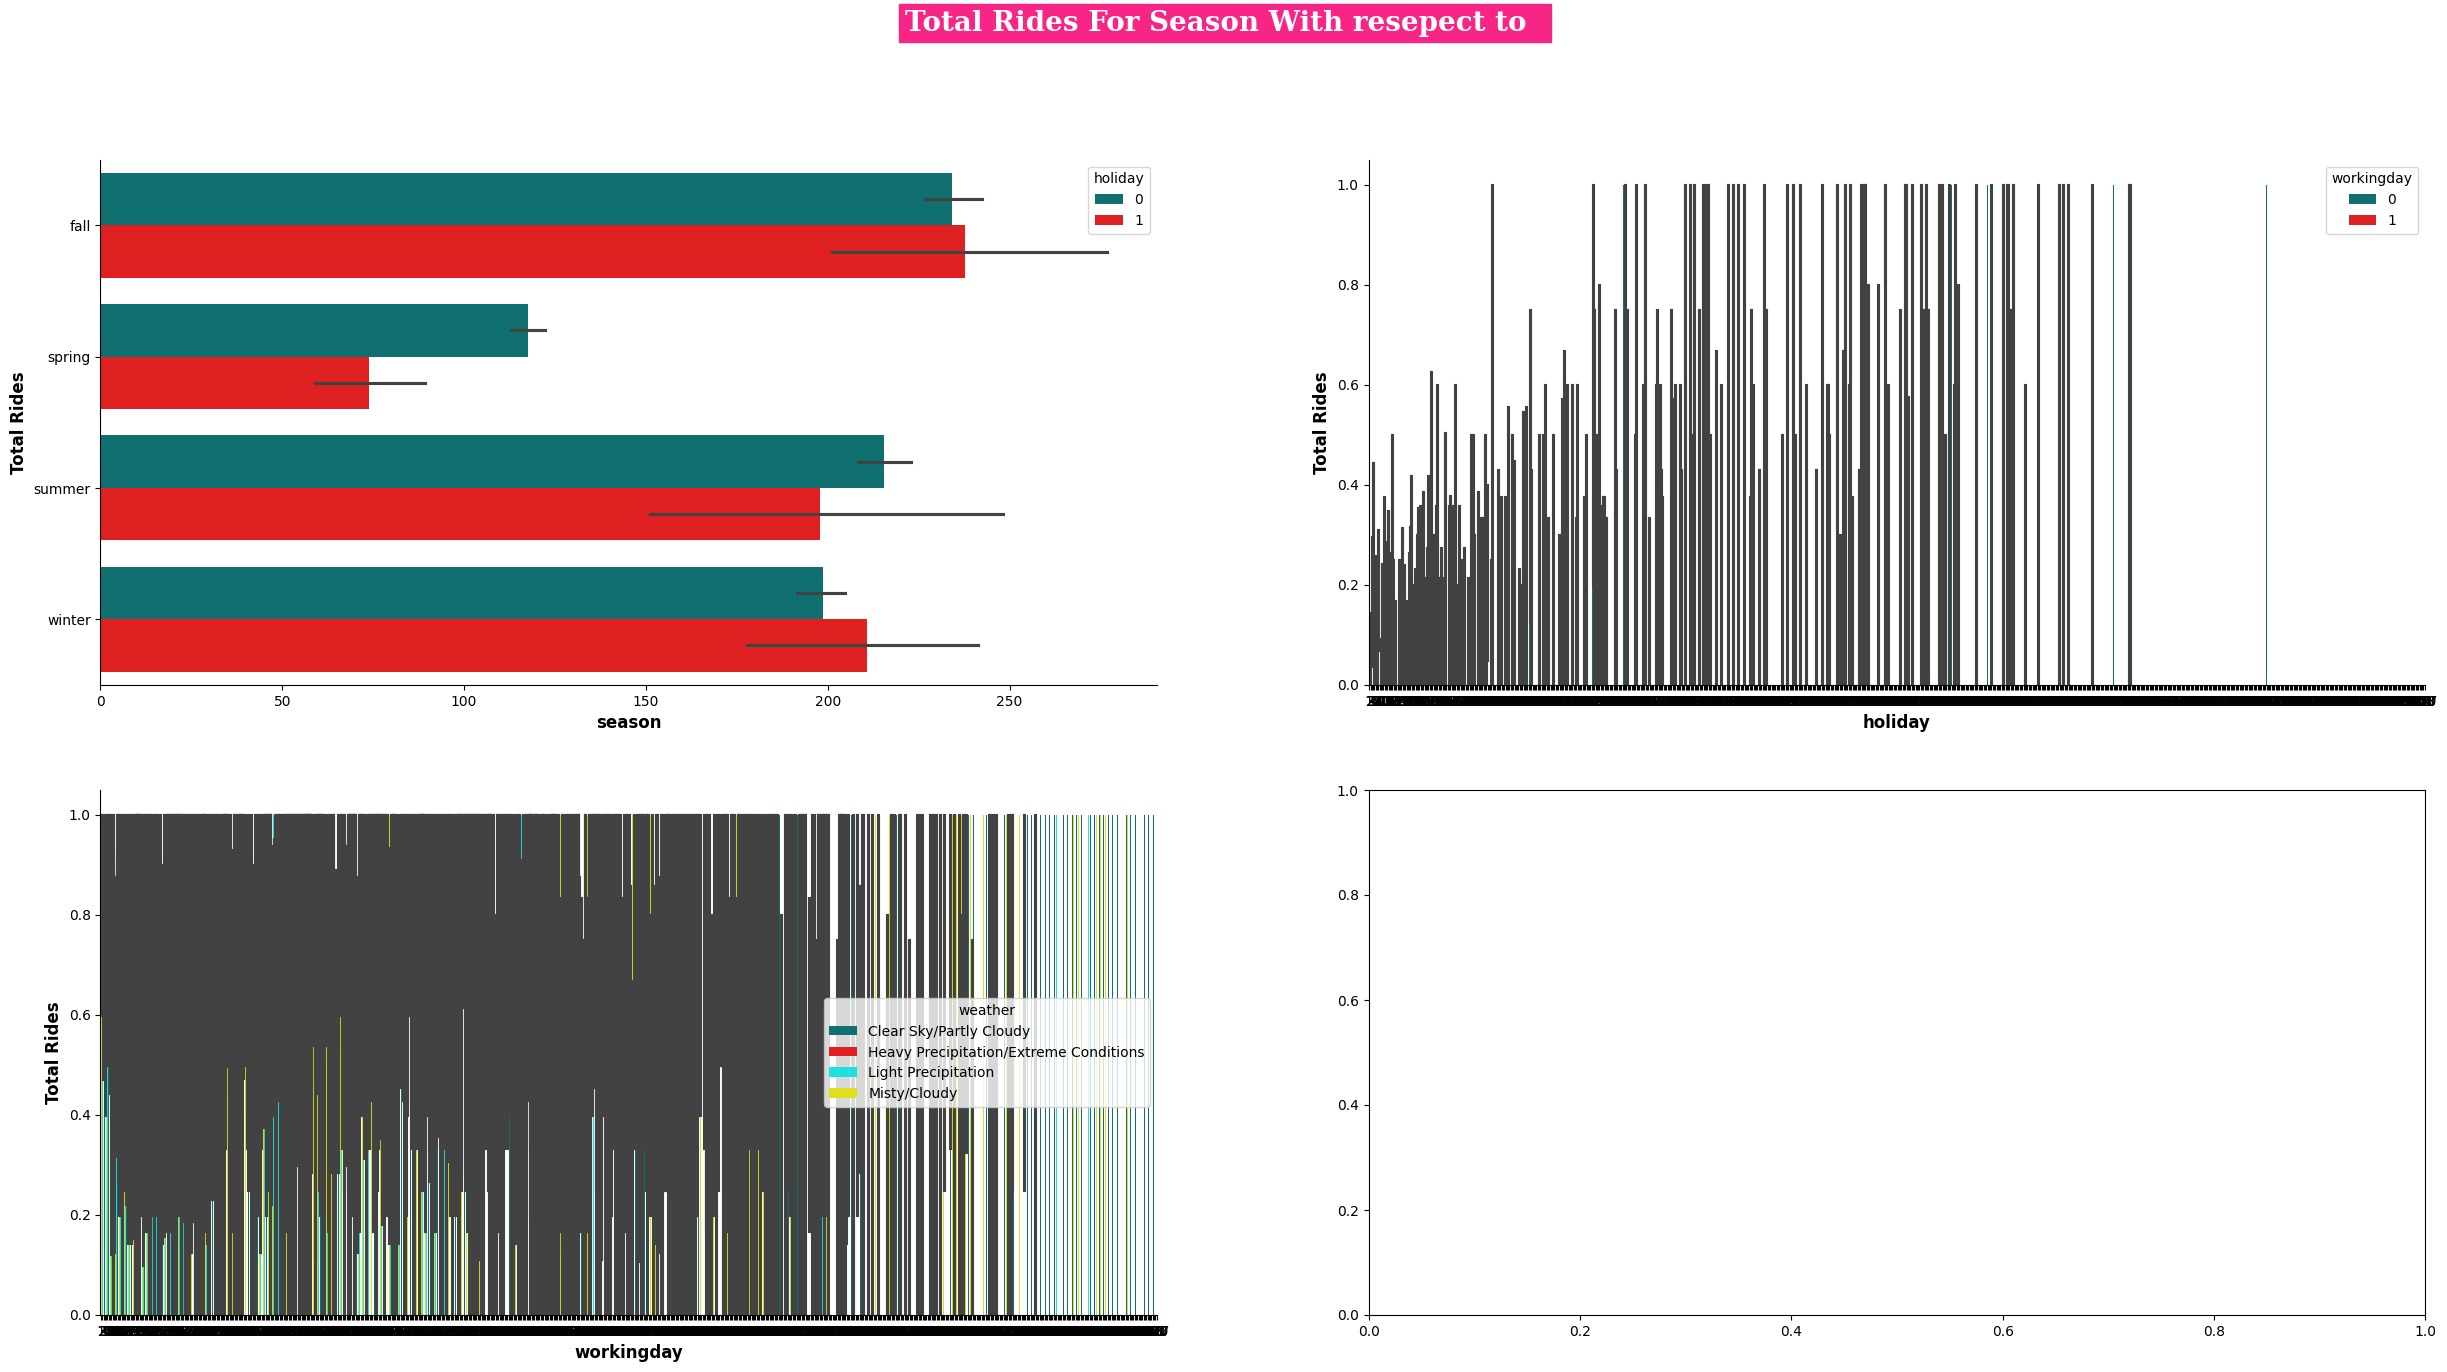

In [ ]:
hue_col = ['season', 'holiday', 'workingday', 'weather']
plt.figure(figsize=(30,15))
c = ["teal", "red", 'cyan' , 'yellow' ]
plt.suptitle('Total Rides For Season With resepect to  ',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor="#F72585",color='w')

for i in range(0, 4):
  plt.subplot(2, 2, i+1)
  sns.barplot(data = x, y = cat_col[i], x ='Total_users', hue = hue_col[i+1],palette = c )
  # plt.title(f'{cat_col[i].upper()} Vs Total Users/Rides',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor="purple",color='w' )
  plt.xlabel(f'{cat_col[i]}',fontsize=12,fontweight='bold')
  plt.ylabel('Total Rides', fontsize=12,fontweight='bold')
  sns.despine()

plt.show()

In [ ]:
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')